# 9.1 모형 결합

In [6]:
# 앙상블 방법론!
# 여러개의 분류 모형을 하나만 사용하는 것이 아니라 여러개를 동시에 사용해서 성능을 높이려는 시도
# 회귀분석에서는 여러개를 사용하지만 하나만 선택했다. 검증 성능을 기준으로
# 분류는 동시에 두 개 이상을 갖다가 쓰는 게 가능하다. 고르는 문제기 때문에
    # 회귀분석은 주관식 문제다. 10명이 동시에 풀면 다 다른 값을 낼 가능성이 높다. 더 잘 푼다는 보장이 없다
    # 분류문제는 명령의 후보 중에서 객관식 문제처럼 하나를 고르는 것
    # 그 경우에는 다수결 원리에 의해서 가장 많이 골라지는 답이 생길 수 있다
    # 실제로 더 좋은 결과가 나오는 경향이 있다

모형 결합(model combining) 방법은 앙상블 방법론(ensemble methods)이라고도 한다. 이는 특정한 하나의 예측 방법이 아니라 복수의 예측 모형을 결합하여 더 나은 성능의 예측을 하려는 시도이다. 

모형 결합 방법을 사용하면 일반적으로 계산량은 증가하지만 다음과 같은 효과가 있다.

* 단일 모형을 사용할 때 보다 성능 분산이 감소하고, 즉 과최적화를 방지한다.
* 개별 모형이 성능이 안좋을 경우에는 결합 모형의 성능이 더 향상된다.

In [8]:
# 성능 분산은 일정한 트레이닝 퍼포먼스에서 나타나는 테스트 성능의 구간을 말한다
# 최고 우등생은 혼자 푸나 같이 푸나 점수 변화가 없을 것.
# 80점 정도 맞는 사람은 여러명 같이 모여서 머리 맞대면 80점보다 높게 나올 가능성이 굉장히 높다. 아주 안 좋을 경우는 아니다

모형 결합 방법은 크게 나누어 취합(aggregation) 방법론과 부스팅(boosting) 방법론으로 나눌 수 있다.

* 취합 방법론은 사용할 모형의 집합이 이미 결정되어 있지만
* 부스팅 방법론은 사용할 모형을 점진적으로 늘려간다.

각 방법론의 대표적인 방법들은 아래와 같다.

* 취합 방법론
 * 다수결 (Majority Voting)
 * 배깅 (Bagging)
 * 랜덤포레스트 (Random Forests)



* 부스팅 방법론
 * 에이다부스트 (AdaBoost)
 * 그레디언트 부스트 (Gradient Boost)
 
 
여기에서는 우선 취합 방법에 대해 살펴본다.

In [13]:
# 취합 방법론과 부스팅 방법론의 차이

# 취합 방법론은 미리 10명이 풀거야라고 정해놓는다.
    # 10명이 모두 같은 문제를 푼다
    # 모델마다 역할이 모두 같다
# 부스팅 방법론은 미리 10명 정하지 않고 처음에는 한 명 풀고 다음 두번째 사람이 와서 도와주고, 세번째... 도와주고 하는 식
    # 부스팅 방법론은 두 번째 온 사람은 다른 문제를 푼다. 첫 번째 사람이 잘 못하는 것에 집중한다.
    # 부스팅 방법론에서는 문제를 푸는 타깃 문제가 모델마다 역할이 달라지게 된다

### 다수결 방법

In [16]:
# 전혀 다른 모형도 결합할 수 있다
# 가장 단순한 모델 결합 방식
# 로지스틱 회귀분석, LDA, QDA, 가우시안 나이브베이즈, 베르누이 나이브베이즈, 멀티노미얼 나이브베이즈, 디시전 트리 7가지

다수결 방법은 가장 단순한 모형 결합 방법으로 전혀 다른 모형도 결합할 수 있다. 다수결 방법은 Hard Voting 과 Soft Voting 두 가지로 나뉘어진다. 

* hard voting: 단순 투표. 개별 모형의 결과 기준 # 누가 뽑혔나
* soft voting: 가중치 투표. 개별 모형의 조건부 확률의 합 기준
 


In [18]:
# 하드 보팅은 한 사람당 표를 하나만 가지고 있는 경우.
# 소프트 보팅은 한 사람마다 10표씩 가지고 있는 경우. 5표 5표 나눌 수도 있고 3표 7표 나눌 수도 있음

Scikit-Learn 의 ensemble 서브패키지는 다수결 방법을 위한 [`VotingClassifier`](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.VotingClassifier.html) 클래스를 제공한다.
입력 인수는 다음과 같다.

* `estimators`: 개별 모형 목록, 리스트나 named parameter 형식으로 입력
* `voting`: 문자열 {`hard`, `soft`} hard voting 과 soft voting 선택. 디폴트는 `hard`
* `weights`: 사용자 가중치 리스트 # 자기가 갖고 있는 표 수를 다르게 줄 수 있다

In [4]:
# 가중치는 하드보팅, 소프트보팅에서 모두 줄 수 있다
# 하드보팅에서는 카운트에, 소프트보팅에서는 조건부확률에 가중치를 곱해주게 되는 것
# 가중치는 도메인지식보다 하이퍼파라미터다. 좋은 가중치가 나올 때까지 계속해줘야 하는 것
# 머신러닝에서의 하이퍼파라미터는 사용자가 직접 지정하는 파라미터를 말한다

다음과 같은 예제 데이터를 가지는 이진 분류 문제를 생각해보자.

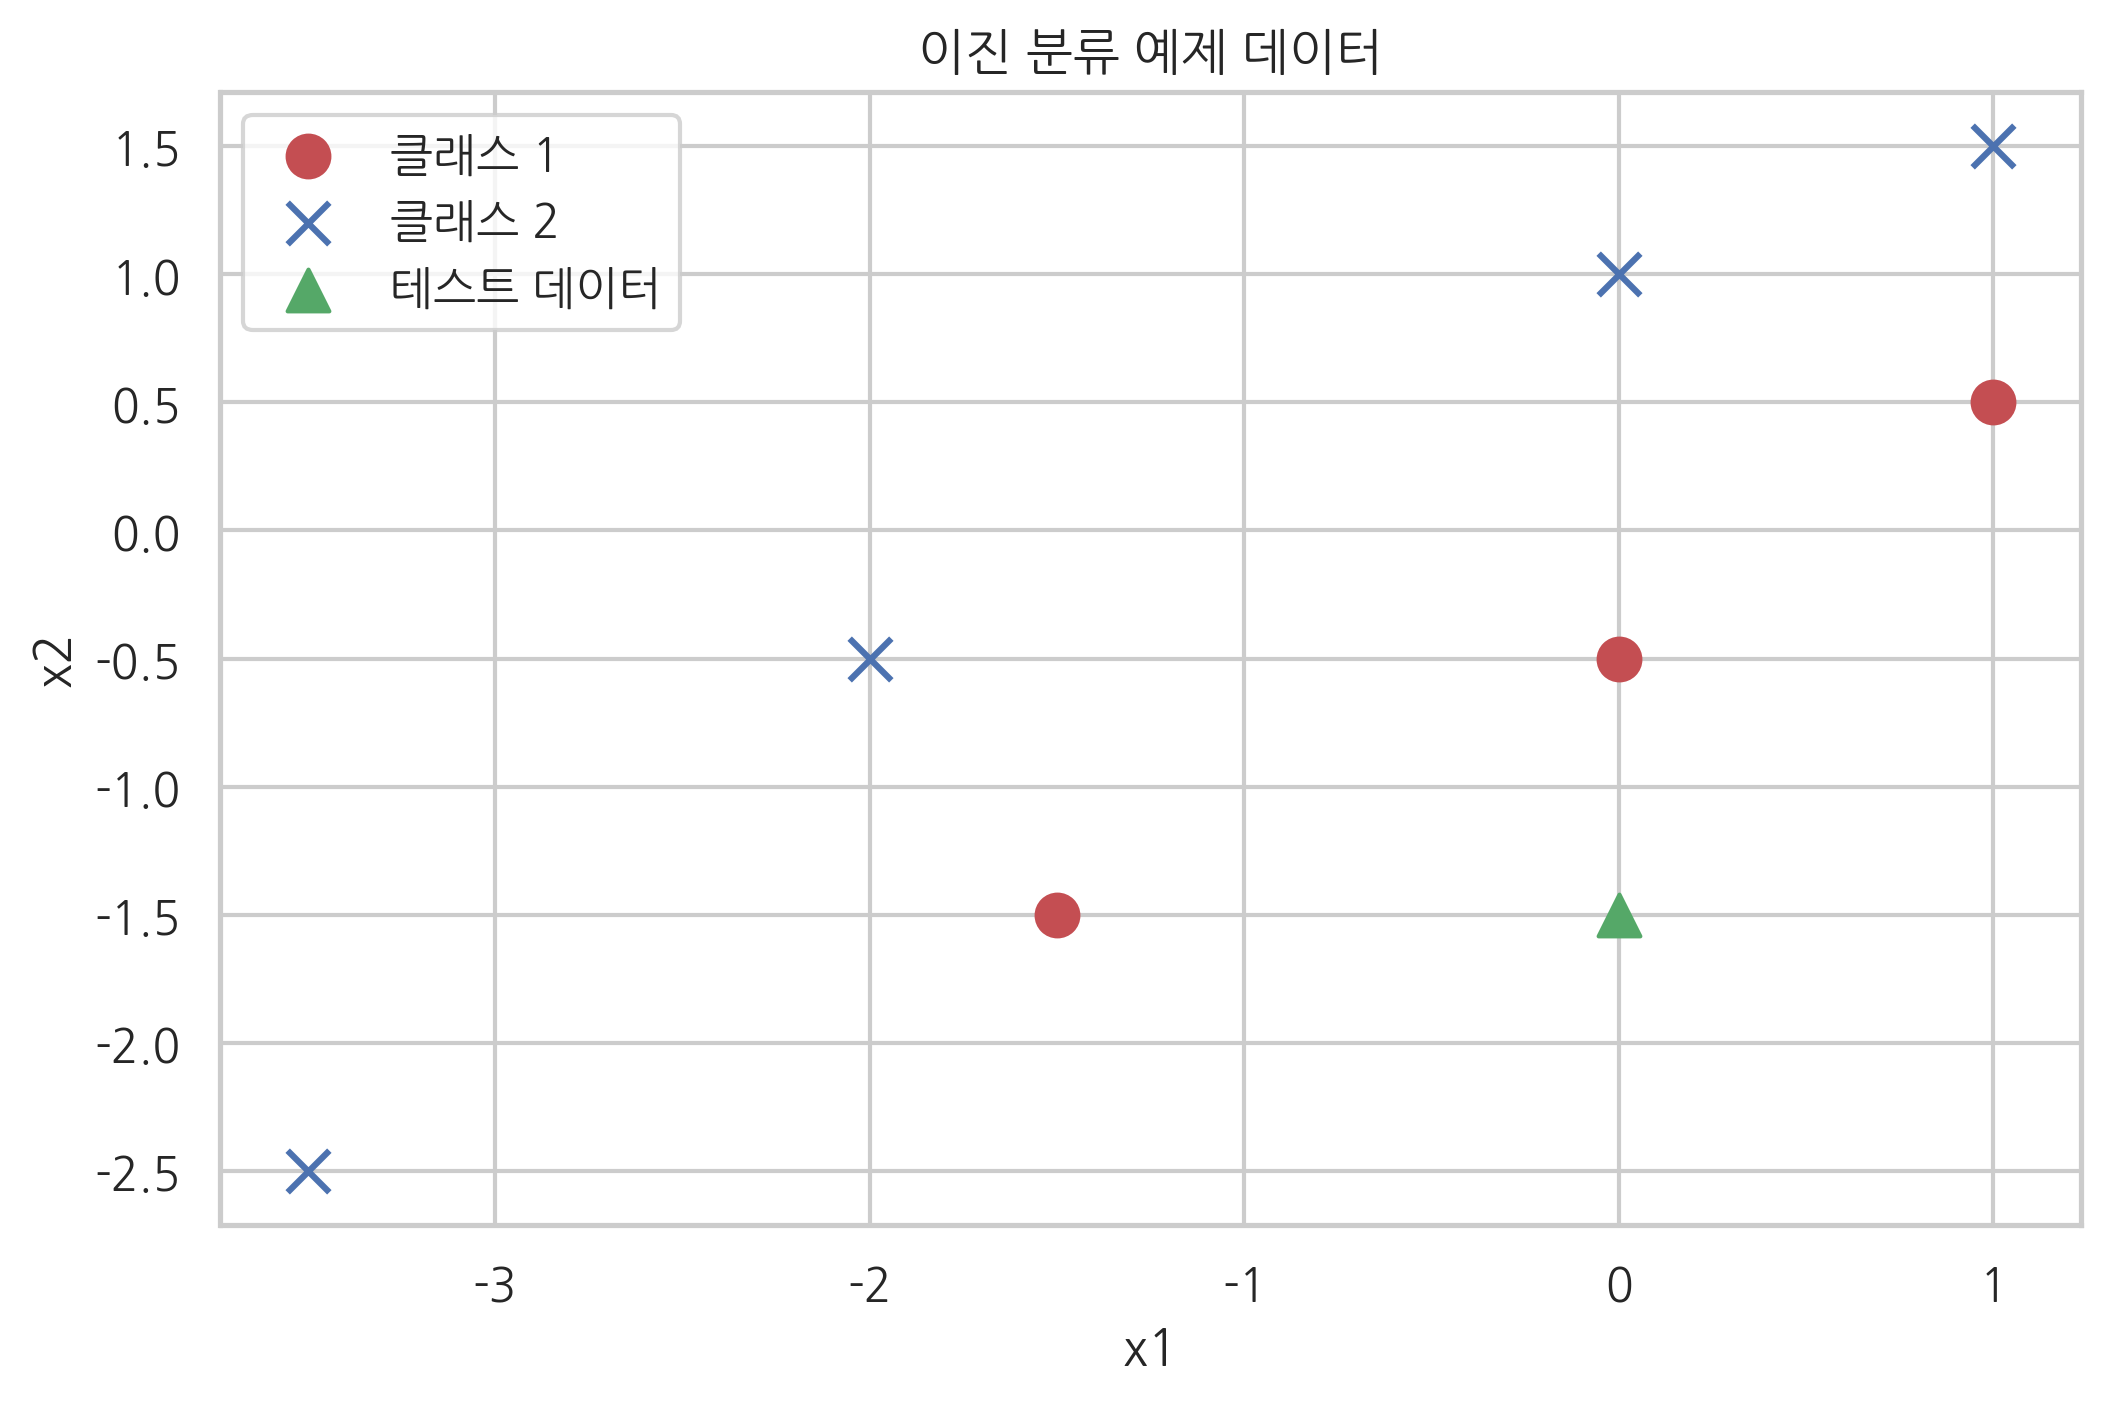

In [1]:
X = np.array([[0, -0.5], [-1.5, -1.5], [1, 0.5], [-3.5, -2.5], [0, 1], [1, 1.5], [-2, -0.5]])
y = np.array([1, 1, 1, 2, 2, 2, 2])
x_new = [0, -1.5]
plt.scatter(X[y == 1, 0], X[y == 1, 1], s=100, marker='o', c='r', label="클래스 1")
plt.scatter(X[y == 2, 0], X[y == 2, 1], s=100, marker='x', c='b', label="클래스 2")
plt.scatter(x_new[0], x_new[1], s=100, marker='^', c='g', label="테스트 데이터")
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("이진 분류 예제 데이터")
plt.legend()
plt.show()

이 문제를 세가지 다른 방법으로 풀어본다.

1. 로지스틱 회귀 모형
2. QDA 모형
3. 가우시안 나이브베이즈 모형

마지막으로 세가지 모형을 다수결로 합친 모형을 `VotingClassifier` 클래스로 만들었다. 다만 세가지 모형의 가중치가 각각 1, 1, 2로 가우시안 나이브베이즈 모형의 가중치를 높였다.

결과는 다음과 같아. 로지스틱 회귀 모형과 가우시안 나이브베이즈 모형은 클래스 1이라는 결과를 보이지만 QDA 모형은 클래스 2라는 결과를 보였다. 소프트 방식의 다수결 모형은 클래스 2라는 결론을 보인다. 만약 하드 방식의 다수결 모형이었다면 예측 결과는 클래스 1이 된다.

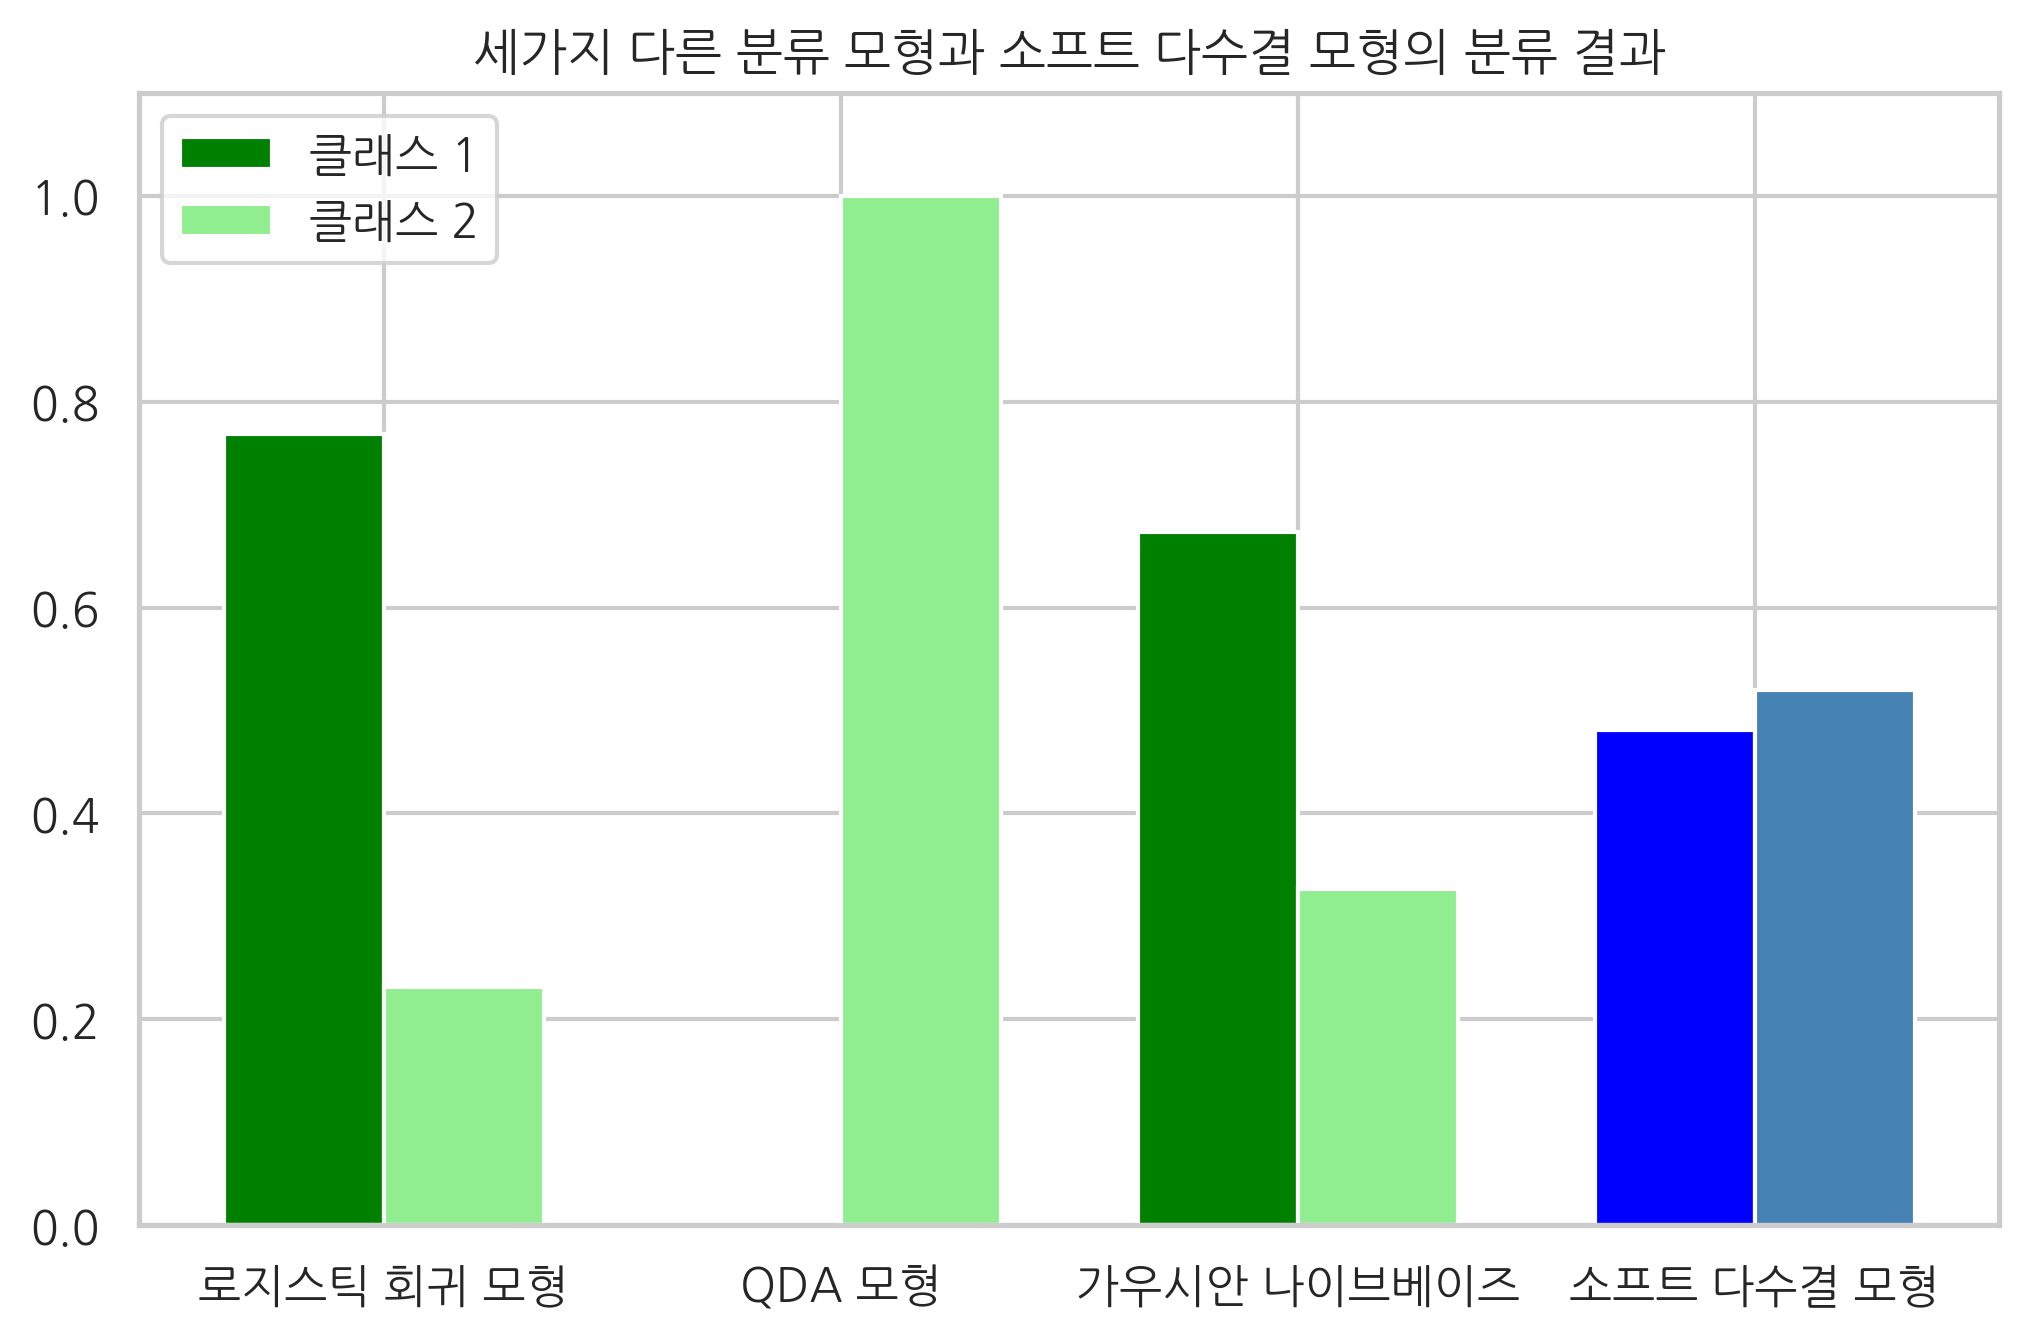

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import VotingClassifier

model1 = LogisticRegression(random_state=1)
model2 = QuadraticDiscriminantAnalysis()
model3 = GaussianNB()
ensemble = VotingClassifier(estimators=[('lr', model1), ('qda', model2), ('gnb', model3)], voting='soft')

probas = [c.fit(X, y).predict_proba([x_new]) for c in (model1, model2, model3, ensemble)]
class1_1 = [pr[0, 0] for pr in probas]
class2_1 = [pr[0, 1] for pr in probas]

ind = np.arange(4)
width = 0.35  # bar width
p1 = plt.bar(ind, np.hstack(([class1_1[:-1], [0]])), width, color='green')
p2 = plt.bar(ind + width, np.hstack(([class2_1[:-1], [0]])), width, color='lightgreen')
p3 = plt.bar(ind, [0, 0, 0, class1_1[-1]], width, color='blue')
p4 = plt.bar(ind + width, [0, 0, 0, class2_1[-1]], width, color='steelblue')

plt.xticks(ind + 0.5 * width, ['로지스틱 회귀 모형', 'QDA 모형', '가우시안 나이브베이즈', '소프트 다수결 모형'])
plt.ylim([0, 1.1])
plt.title('세가지 다른 분류 모형과 소프트 다수결 모형의 분류 결과')
plt.legend([p1[0], p2[0]], ['클래스 1', '클래스 2'], loc='upper left')
plt.show()

In [1]:
# 하드보팅으로 하면 2:1로 파란색이 돼야 하지만 소프트보팅으로 하게 되면 약간의 미세한 차이로 빨간색으로 나올 수도 있다

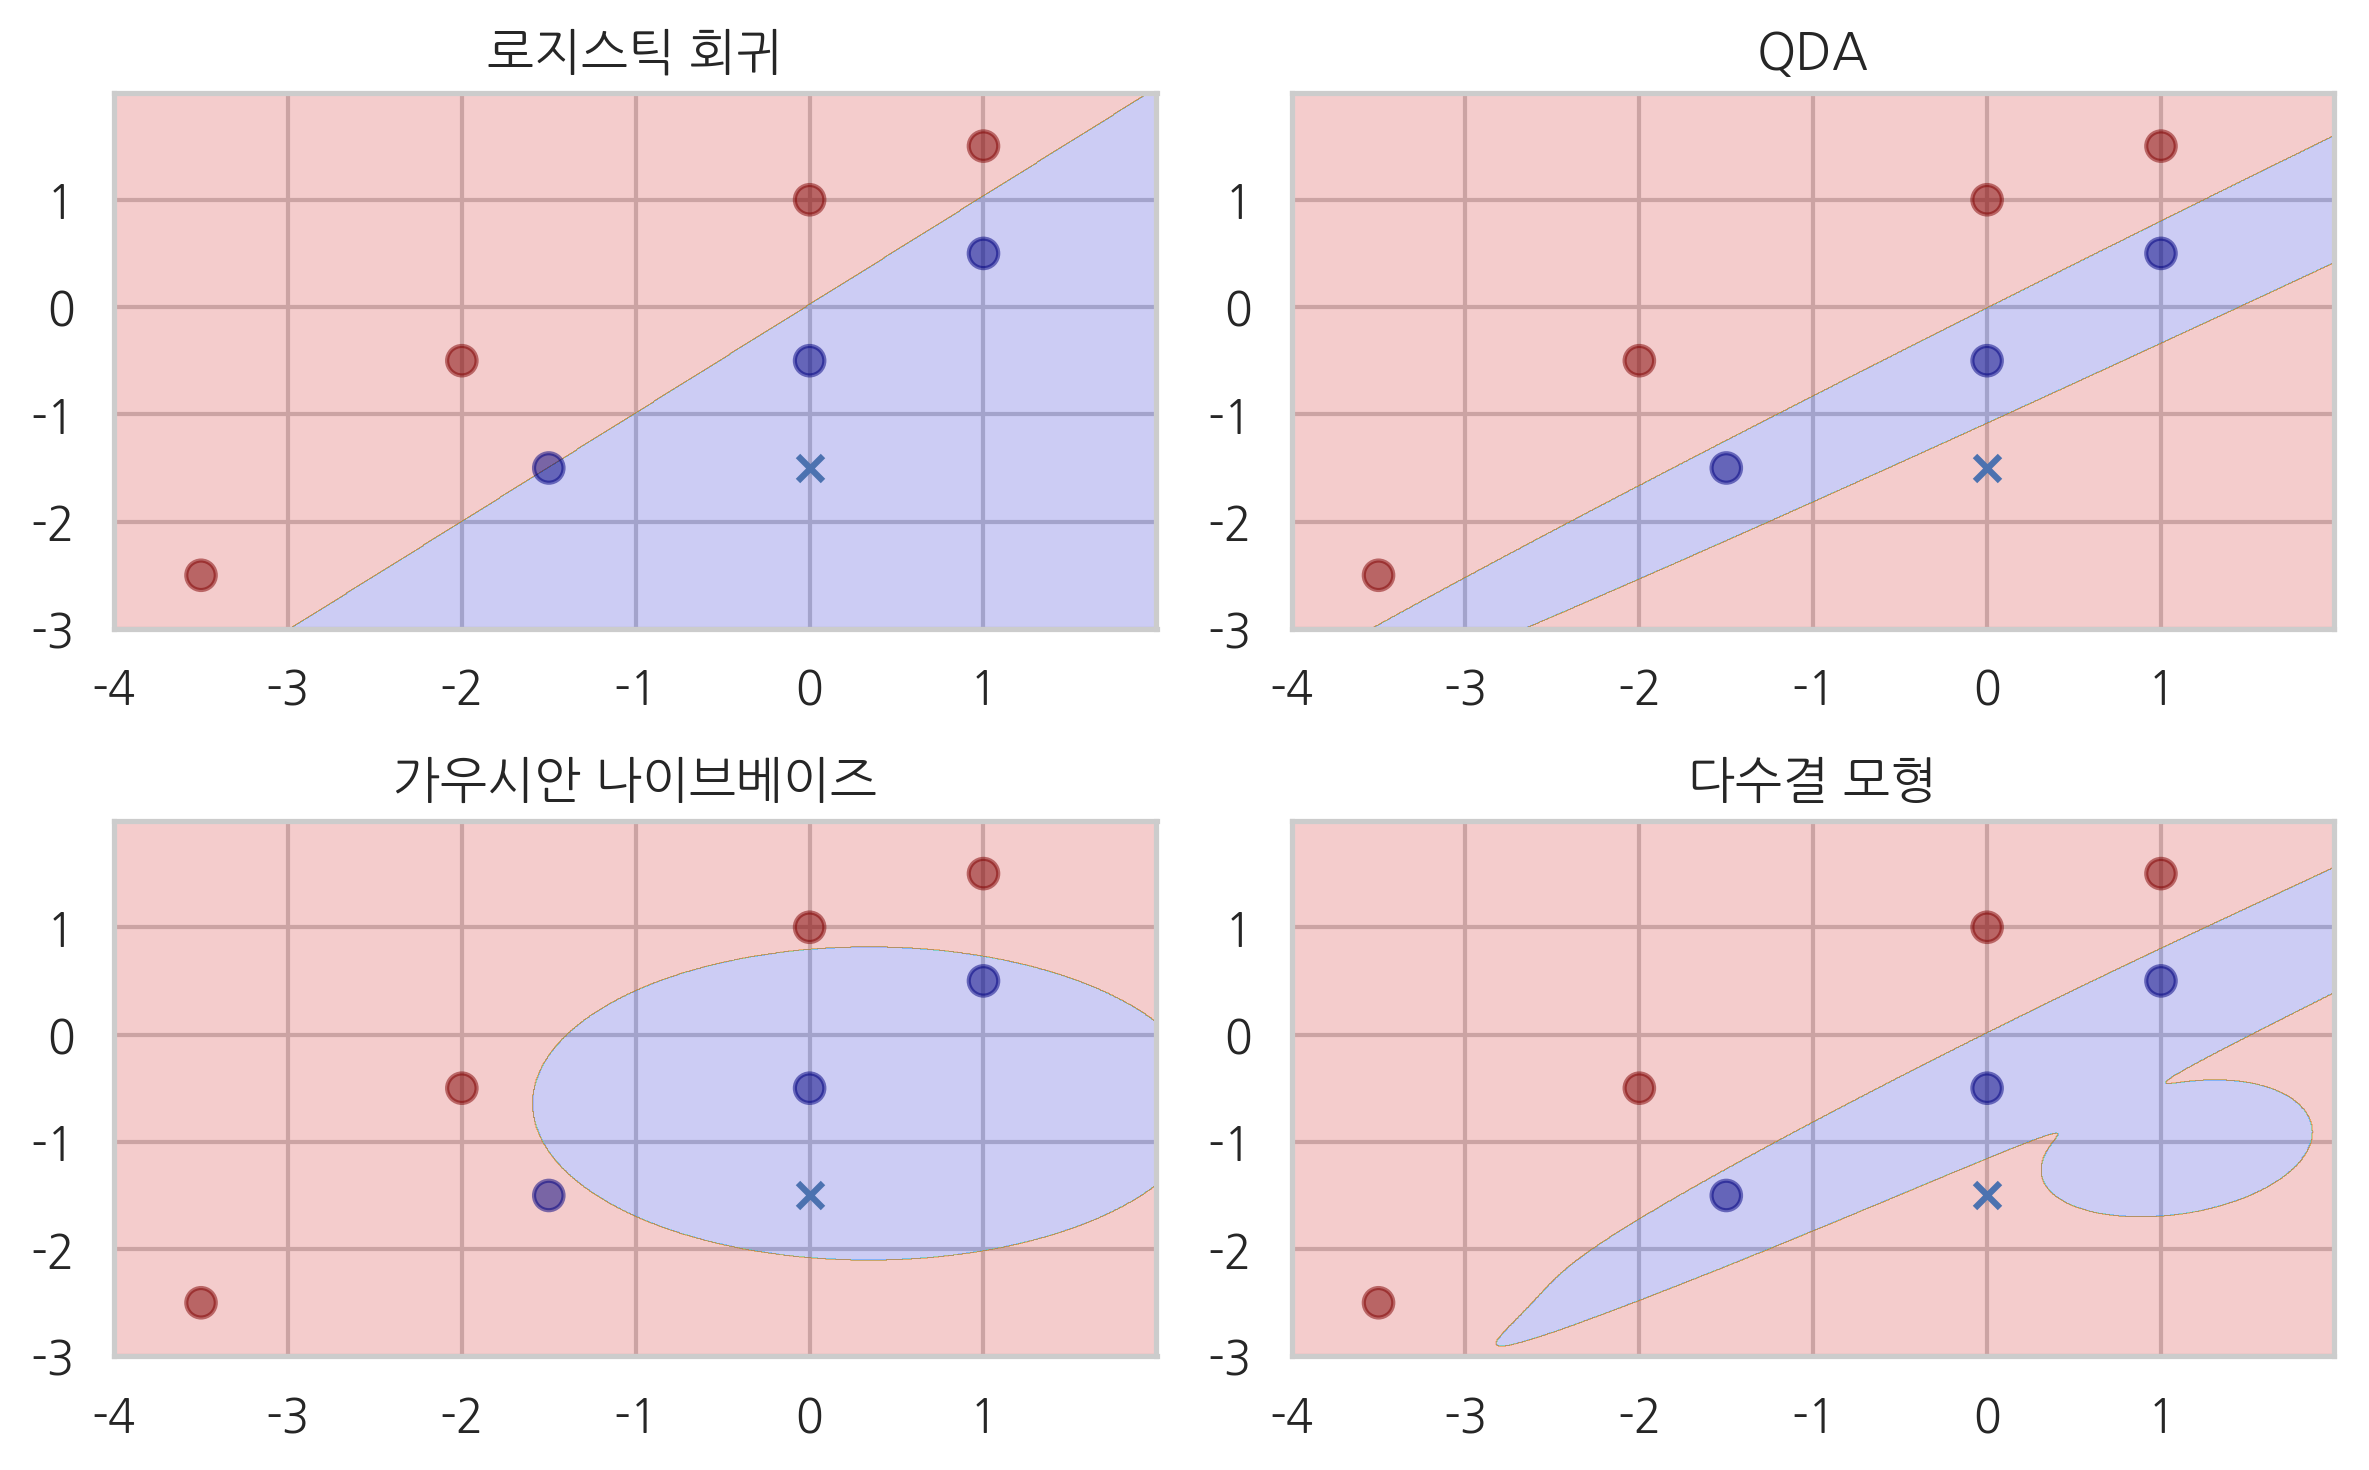

In [3]:
from itertools import product

x_min, x_max = -4, 2
y_min, y_max = -3, 2
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.005),
                     np.arange(y_min, y_max, 0.005))
f, axarr = plt.subplots(2, 2)
for idx, clf, tt in zip(product([0, 1], [0, 1]),
                        [model1, model2, model3, ensemble],
                        ['로지스틱 회귀', 'QDA', '가우시안 나이브베이즈', '다수결 모형']):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    axarr[idx[0], idx[1]].contourf(xx, yy, Z, alpha=0.2, cmap=mpl.cm.jet)
    axarr[idx[0], idx[1]].scatter(
        X[:, 0], X[:, 1], c=y, alpha=0.5, s=50, cmap=mpl.cm.jet)
    axarr[idx[0], idx[1]].scatter(x_new[0], x_new[1], marker='x')
    axarr[idx[0], idx[1]].set_title(tt)
plt.tight_layout()
plt.show()

### 모형 결합을 사용한 성능 향상

다수결 모형이 개별 모형보다 더 나은 성능을 보이는 이유는 다음 실험에서도 확인 할 수 있다.

만약 개별 모형이 정답을 출력할 확률이 $p$인 경우에 서로 다르고 독립적인 모형을 $N$개 모아서 다수결 모형을 만들면 정답을 출력할 확률이 다음과 같아진다.


$$ \sum_{k>\frac{N}{2}}^N \binom N k p^k (1-p)^{N-k} $$ 

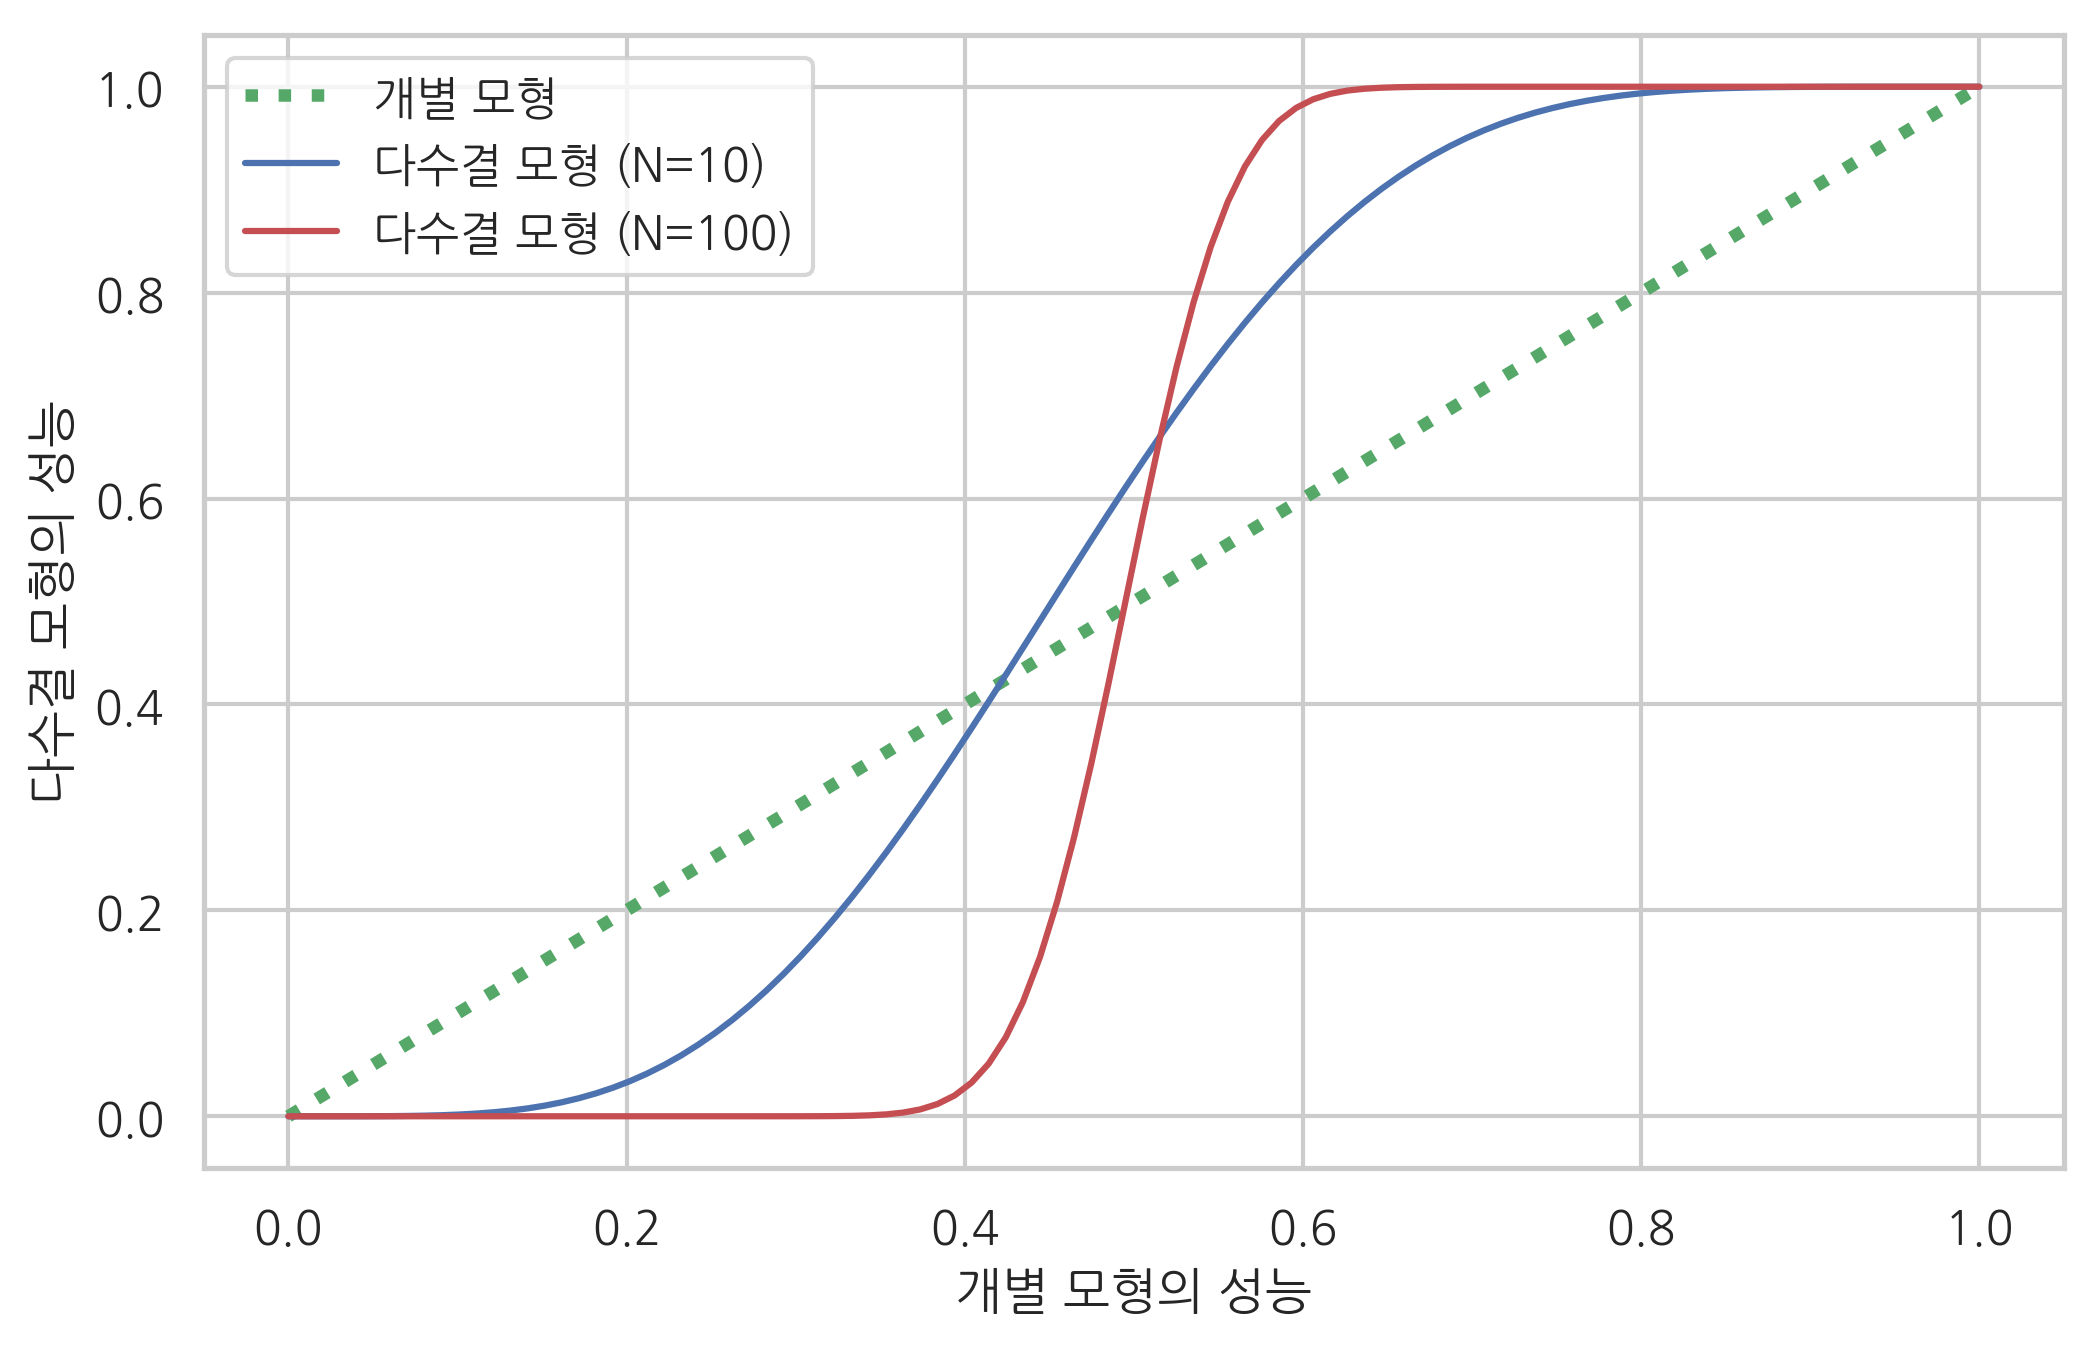

In [4]:
def total_error(p, N):
    te = 0.0
    for k in range(int(np.ceil(N/2)), N + 1):
        te += sp.misc.comb(N, k) * p**k * (1-p)**(N-k)
    return te


x = np.linspace(0, 1, 100)
plt.plot(x, x, 'g:', lw=3, label="개별 모형")
plt.plot(x, total_error(x, 10), 'b-', label="다수결 모형 (N=10)")
plt.plot(x, total_error(x, 100), 'r-', label="다수결 모형 (N=100)")
plt.xlabel("개별 모형의 성능")
plt.ylabel("다수결 모형의 성능")
plt.legend(loc=0)
plt.show()

In [3]:
# 우리는 지금까지 정확도를 높이기 위해 많은 노력을 했다
# 나이브베이즈할 때 카운트벡터라이저, tfidf, stopwords를 쓰느냐에 따라 정확도가 0.001 높이기 위해 별짓을 다했다
# 그랬는데 이제 높은 성능을 낼 필요 없다는 것. 50점만 넘으면 된다는 것
# 그대신 50점이 넘는 애들을 많이만 가지고 오면 성능을 높이는 것은 시간 문제다. 컴퓨터 성능 문제다라는 것
# 단, 이 커브에는 조건이 하나 있다. 각각의 N개의 모형들이 서로 독립적으로 의사 결정을 해야 한다는 가정이 하나 들어가 있다.
# 남의 것 보고 배끼면 안 된다. 배끼면 1000명이 모여도 한 명이 한 것과 마찬가지.
# 로지스틱 10개 집어넣어봤자 하나 집어넣은 것과 똑같다. 성향이 비슷한 것들을 집어넣어봤자 무쓸모
# 똑같이 안 만들게 하기 위해, 다른 의사결정 내리게 하기 위해 뭔가를 해야 한다.
# 기존에 쓸 수 있는 모델은 7가지. 하이퍼파라미터 바꿔주는 방법도 있지만 한계 있다
# 그래서 나온 방법이 배깅 방법. 데이터를 나눠주거나, 독립변수를 나눠주거나

#### 연습 문제 1

breast cancer 분류 문제를 다수결 방법을 사용하여 풀어라. 모형의 종류 및 개수나 다수결 방법은 마음대로 한다. K=5인 교차 검증을 하였을 때 성능의 평균과 표준편차를 구하라.

### 배깅

앞서 모형 결합에서 사용하는 독립적인 모형의 수가 많을 수록 성능 향상이 일어날 가능성이 높다는 것을 알았다. 각각 다른 확률 모형을 사용하는데에는 한계가 있으므로 보통은 배깅 방법을 사용하여 같은 확률 모형을 쓰지만 서로 다른 결과를 출력하는 다수의 모형을 만든다.

배깅(bagging)은 동일한 모형과 모형 모수를 사용하는 대신 부트스트래핑(bootstrapping)과 유사하게 트레이닝 데이터를 랜덤하게 선택해서 다수결 모형을 적용한다.

트레이닝 데이터를 선택하는 방법에 따라 다음과 같이 부르기도 한다.

* 같은 데이터 샘플을 중복사용(replacement)하지 않으면: Pasting
* 같은 데이터 샘플을 중복사용(replacement)하면 Bagging
* 데이터가 아니라 다차원 독립 변수 중 일부 차원을 선택하는 경우에는: Random Subspaces
* 데이터 샘플과 독립 변수 차원 모두 일부만 랜덤하게 사용하면: Random Patches

성능 평가시에는 트레이닝용으로 선택한 데이터가 아닌 다른 데이터를 사용할 수도 있다. 이런 데이터를 OOB(out-of-bag) 데이터라고 한다.

<img src="https://datascienceschool.net/upfiles/677f18a151c64e5daa9c28f6cb564808.png" width="100%">

그림 44.1 : 배깅

Scikit-Learn 의  ensemble 서브패키지는 배깅 모형 결합을 위한 [`BaggingClassifier`](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html) 클래스를 제공한다. 사용법은 다음과 같다.

* `base_estimator`: 기본 모형
* `n_estimators`: 모형 갯수. 디폴트 10
* `bootstrap`: 데이터의 중복 사용 여부. 디폴트 True
* `max_samples`: 데이터 샘플 중 선택할 샘플의 수 혹은 비율. 디폴트 1.0
* `bootstrap_features`: 특징 차원의 중복 사용 여부. 디폴트 False
* `max_features`: 다차원 독립 변수 중 선택할 차원의 수 혹은 비율 1.0 

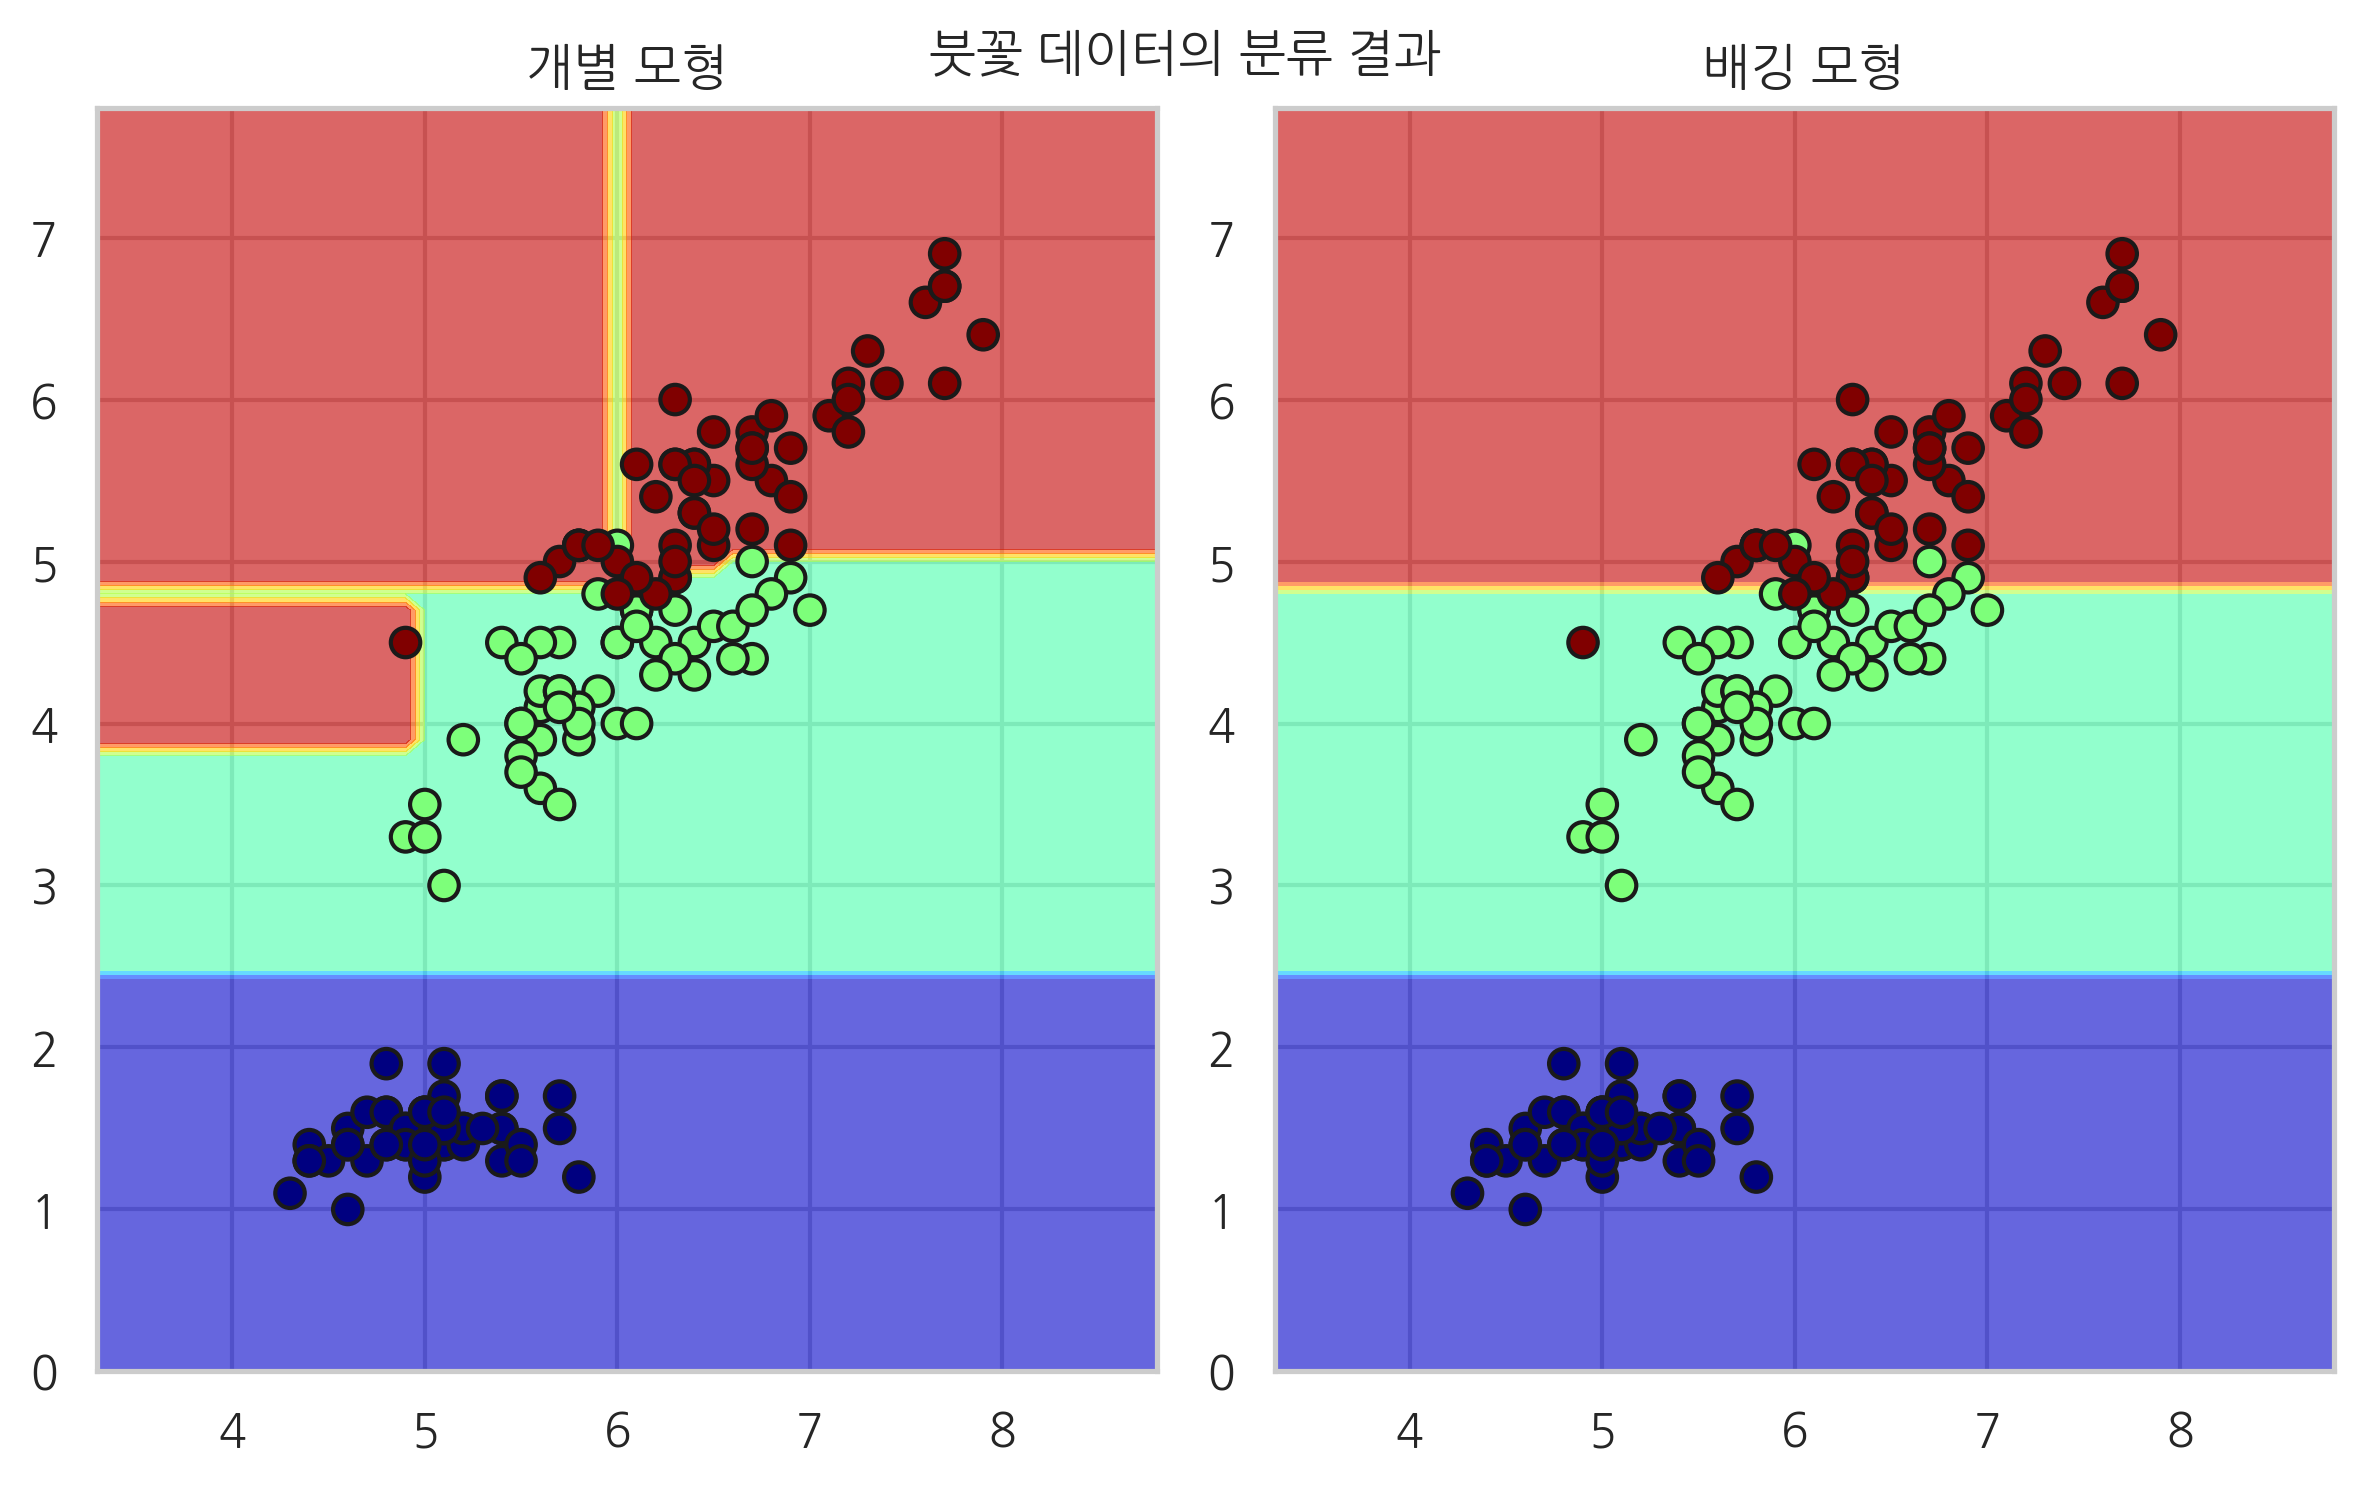

In [5]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier

iris = load_iris()
X, y = iris.data[:, [0, 2]], iris.target

model1 = DecisionTreeClassifier(max_depth=10, random_state=0).fit(X, y)
model2 = BaggingClassifier(DecisionTreeClassifier(max_depth=2), n_estimators=100, random_state=0).fit(X, y)

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
plt.subplot(121)
Z1 = model1.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
plt.contourf(xx, yy, Z1, alpha=0.6, cmap=mpl.cm.jet)
plt.scatter(X[:, 0], X[:, 1], c=y, alpha=1, s=50, cmap=mpl.cm.jet, edgecolors="k")
plt.title("개별 모형")
plt.subplot(122)
Z2 = model2.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
plt.contourf(xx, yy, Z2, alpha=0.6, cmap=mpl.cm.jet)
plt.scatter(X[:, 0], X[:, 1], c=y, alpha=1, s=50, cmap=mpl.cm.jet, edgecolors="k")
plt.title("배깅 모형")
plt.suptitle("붓꽃 데이터의 분류 결과")
plt.tight_layout()
plt.show()

In [8]:
# 개별모형은 지금 있는 트레이닝 데이터에만 잘 맞추려하다보니 오버피팅 된 것
# 배깅 모형은 오버피팅이 안 나온다.
# 아웃라이어는 소수의 데이터다.
# 대부분의 대이터에는 아웃라이어가 포함돼 있지 않으므로 다수결에서 져서 오버피팅이 일어나지 않은 것

#### 연습 문제 2

1. breast cancer 분류 문제를 Bagging을 사용하여 풀어라. 모형의 종류 및 개수나 Bagging 방법은 마음대로 한다. K=5인 교차 검증을 하였을 때 성능의 평균과 표준편차를 구하라.
2. bagging 모형의 성능을 개별 모형과 비교하라.

In [9]:
# 로지스틱 회귀처럼 개별 모형이 성능이 좋으면 배깅 모형의 성능은 개별 모형 성능과 큰 차이가 없다

### 랜덤포레스트

In [11]:
# 의사결정나무를 개별 모형으로 사용하는 모형 결합 방법!
# 기본적으로 다차원 독립 변수 중 일부 차원을 선택하는 Subspace 방법을 쓴다

랜덤포레스트(Random Forest)는 의사 결정 나무(Decision Tree)를 개별 모형으로 사용하는 모형 결합 방법을 말한다.

랜덤포레스트는 데이터 특징차원의 일부만 선택하여 사용한다. 하지만 노드 분리시 모든 독립 변수들을 비교하여 최선의 독립 변수를 선택하는 것이 아니라 독립 변수 차원을 랜덤하게 감소시킨 다음 그 중에서 독립 변수를 선택한다. 이렇게 하면 개별 모형들 사이의 상관관계가 줄어들기 때문에 모형 성능의 변동이 감소하는 효과가 있다.

이러한 방법을 극단적으로 적용한 것이 Extremely Randomized Trees 모형으로 이 경우에는 각 노드에서 랜덤하게 독립 변수를 선택한다.

<img src="https://datascienceschool.net/upfiles/79eb26f875f045ee82e823c09fbe980e.png" width="100%">

In [17]:
# 하나의 모델에 한 종류의 데이터를 주는 게 아니라 하나의 노드마다 한 종류의 데이터를 준다
# 이렇게 주는 것은 디시전트리가 아니면 못 한다. 다른 애들은 노드라는 개념이 없기 때문에
# 디시전 트리는 각 노드별로 섭스페이싱을 새로 할 수 있다
# 다만 디시전트리는 그리디하게 선택한다. 다음 스텝을 생각하지 않고 첫번째에서 잘하는 것을 뽑아버리는 것.
# 그런데 랜덤 포레스트는 일부 변수만 뽑아서 쓰기 때문에 가장 잘하는 것이 뽑히지 않는 경우가 생길 수 있다
# 더 좋은 성능을 낼 수도 있다는 것. 그런 기회를 원천적으로 차단하지 않는다는 것.
# 그리디한 선택으로 가장 좋은 기회 박탈되는 것을 막을 수 있다는 얘기.
# 이를 가장 극단적으로 적용한 방법이 Extremely Randomized Trees 모형.
    # 가장 좋은 것을 고르는 것을 하지 않고 그것도 그냥 랜덤하게 독립변수를 선택하는 모형. threshold는 좋은 것을 찾는다 데이터만 랜덤하게
# 일반적 디시전 트리는 첫타석에 나가는 애가 항상 제일 잘하는 애. 첫 모델을 쓰든 두 번째 모델을 쓰든 1번 때문에 생기는 현상은 비슷.
    # 결국 모델이 비슷해져서 모델 사이의 독립성이 떨어진다
# 랜덤하게 주사위 던져서 타순 결정하게 되면 적어도 모든 타자가 비슷한 횟수 만큼 타석에 나가게 된다
# 랜덤포레스트의 첫 번째 좋은 점은 그리디한 선택에 의해 최적의 선택이 안 이루어지는 확률이 떨어진다는 것.
# 두 번째 좋은 점은 각 독립변수의 중요도를 계산할 수 있다는 것이다.
    #일단 기회는 다 줬다. 선수들이 얼마나 잘했는지 못했는지 판단할 때 적어도 공평하게 판단할 수 있다
    # 최소한 타석에 나간 횟수는 똑같았으므로
# 디시전 트리에서는 독립변수 X1은 엔트로피를 낮춘다.
    # X1의 누적 정보획득량이 얼마나 되는지 쌓아보면 그게 일종의 타점이 된다
    # 어떤 애가 중요한 애고 안 중요한 애인지 판단할 수 있게 된다    

그림 44.2 : 랜덤포레스트

랜덤포레스트와 Extremely Randomized Trees 모형은 각각 `RandomForestClassifier`클래스와 `ExtraTreesClassifier` 클래스로 구현되어 있다.

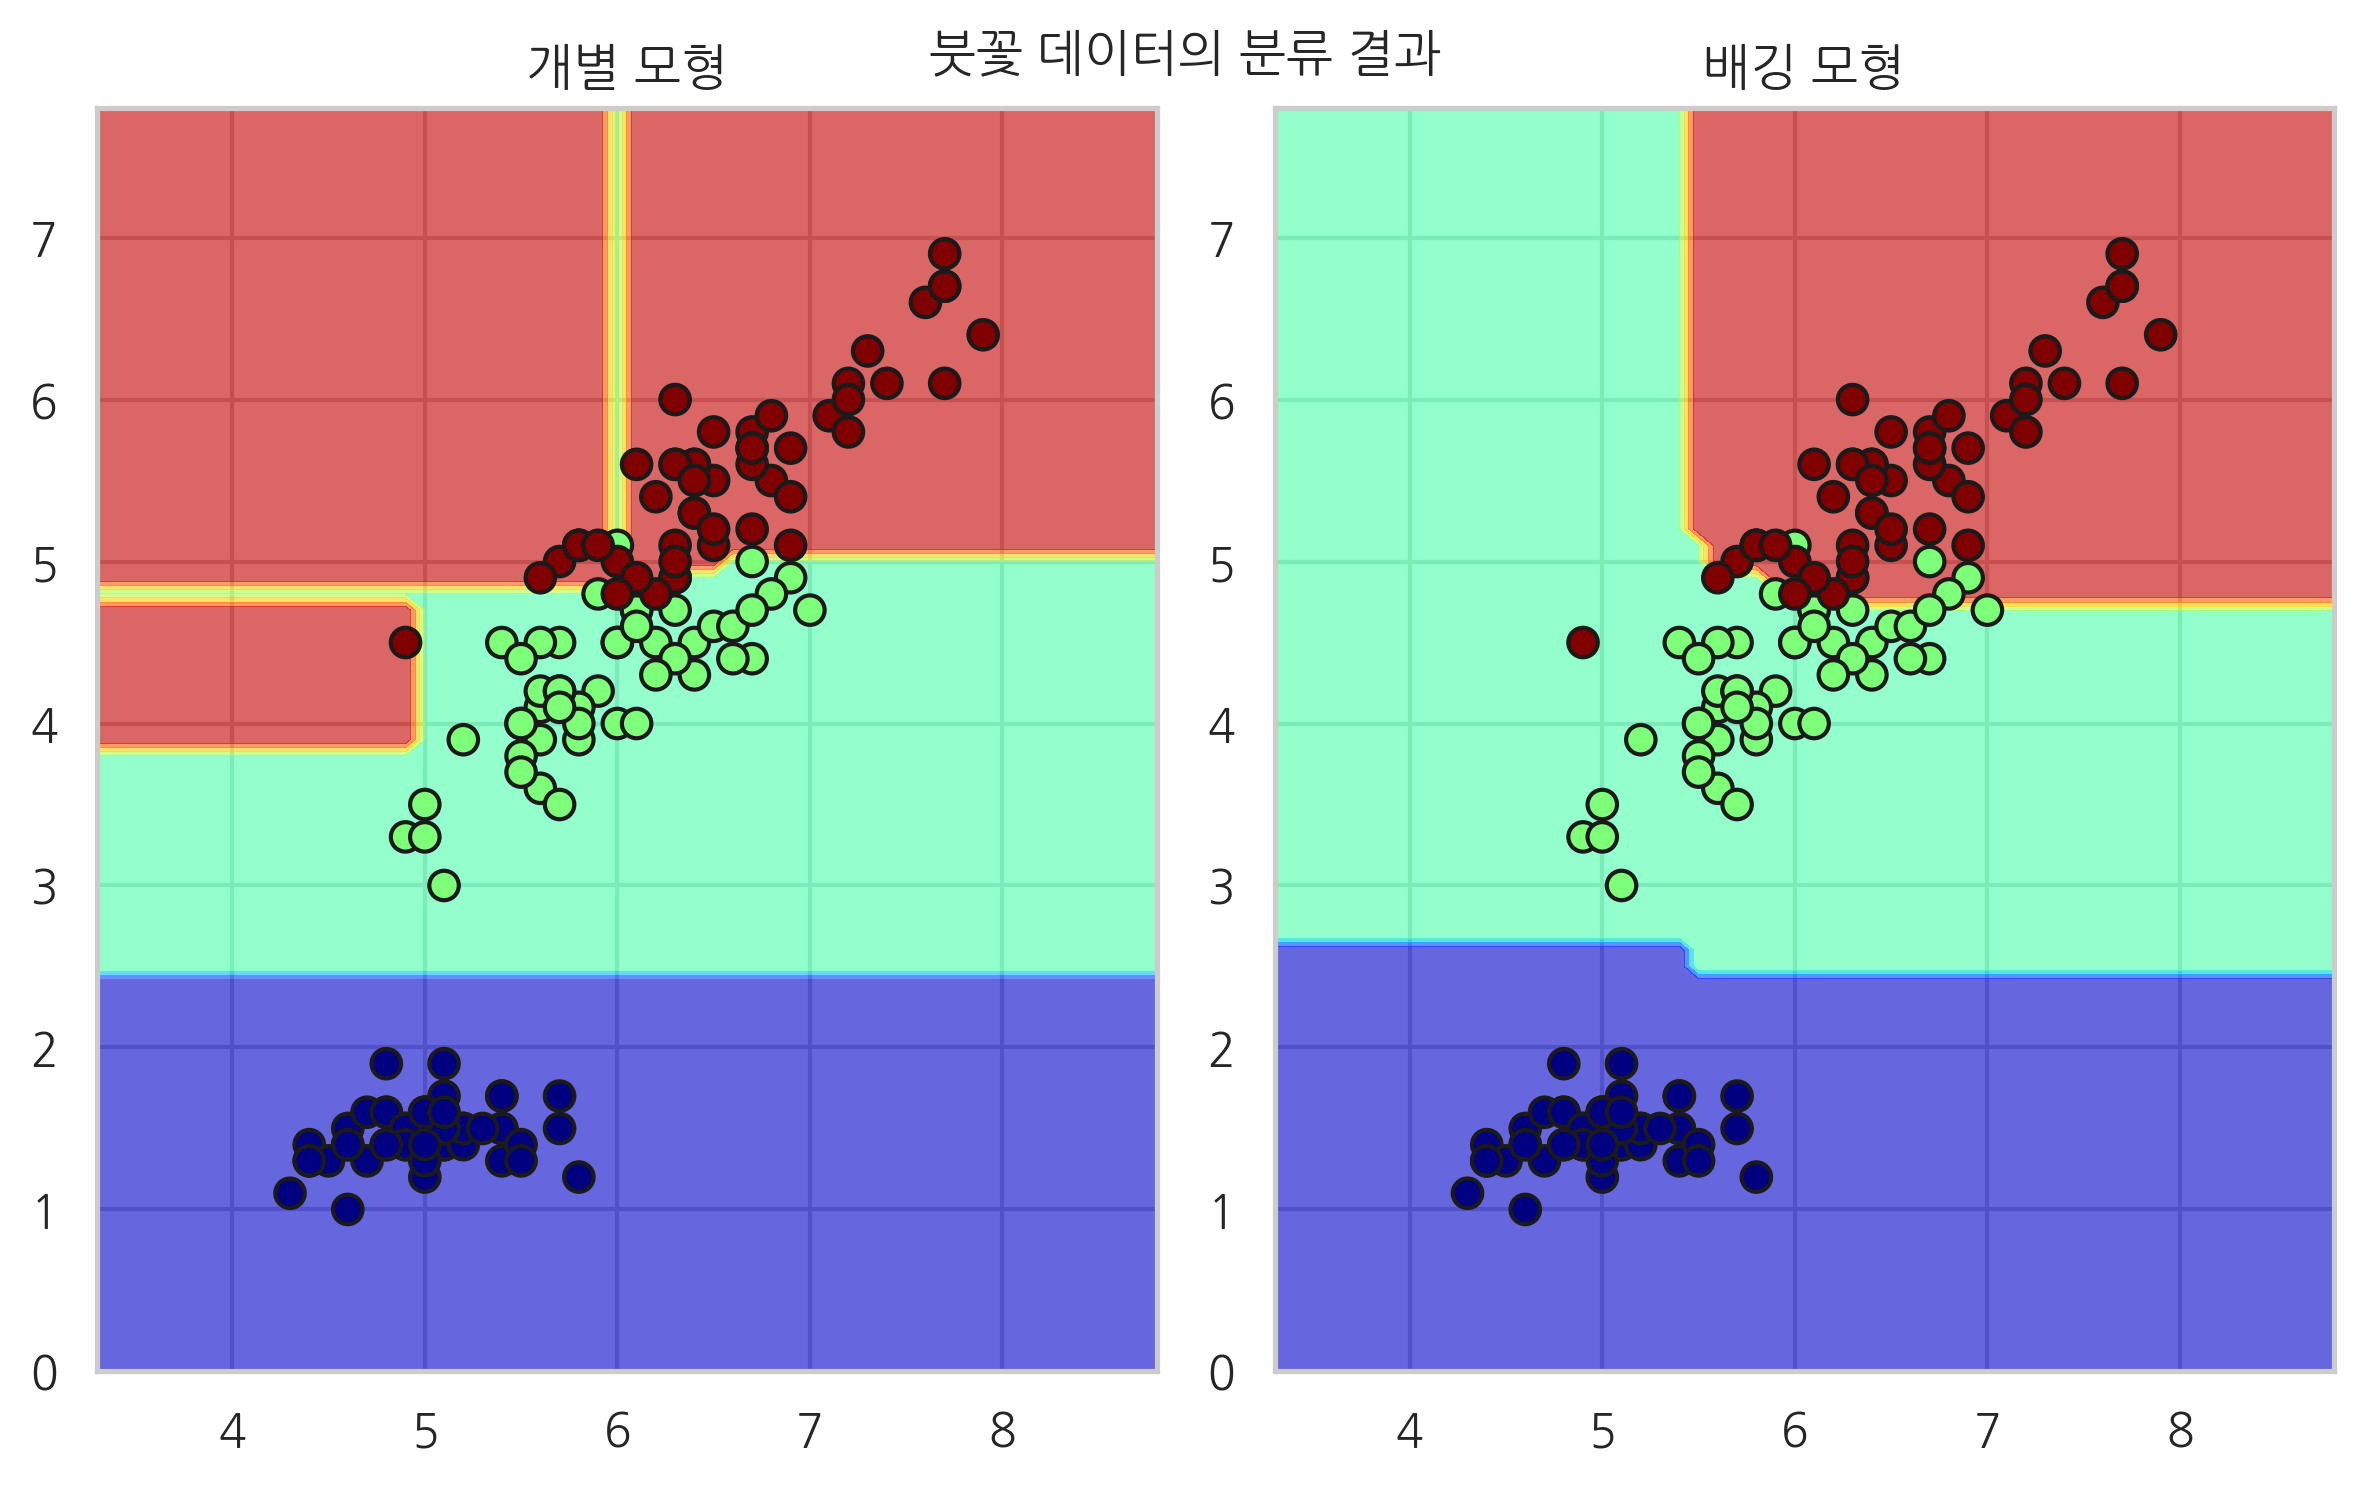

In [6]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

iris = load_iris()
X, y = iris.data[:, [0, 2]], iris.target

model1 = DecisionTreeClassifier(max_depth=10, random_state=0).fit(X, y)
model2 = RandomForestClassifier(max_depth=2, n_estimators=100, random_state=0).fit(X, y)

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
plt.subplot(121)
Z1 = model1.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
plt.contourf(xx, yy, Z1, alpha=0.6, cmap=mpl.cm.jet)
plt.scatter(X[:, 0], X[:, 1], c=y, alpha=1, s=50, cmap=mpl.cm.jet, edgecolors="k")
plt.title("개별 모형")
plt.subplot(122)
Z2 = model2.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
plt.contourf(xx, yy, Z2, alpha=0.6, cmap=mpl.cm.jet)
plt.scatter(X[:, 0], X[:, 1], c=y, alpha=1, s=50, cmap=mpl.cm.jet, edgecolors="k")
plt.title("배깅 모형")
plt.suptitle("붓꽃 데이터의 분류 결과")
plt.tight_layout()
plt.show()

랜덤포레스트의 장점 중 하나는 각 독립 변수의 중요도(feature importance)를 계산할 수 있다는 점이다.

포레스트 안에서 사용된 모든 노드에 대해 어떤 독립 변수를 사용하였고 그 노드에서 얻은 information gain을 구할 수 있으므로 각각의 독립 변수들이 얻어낸 information gain의 평균을 비교하면 어떤 독립 변수가 중요한지를 비교할 수 있다.

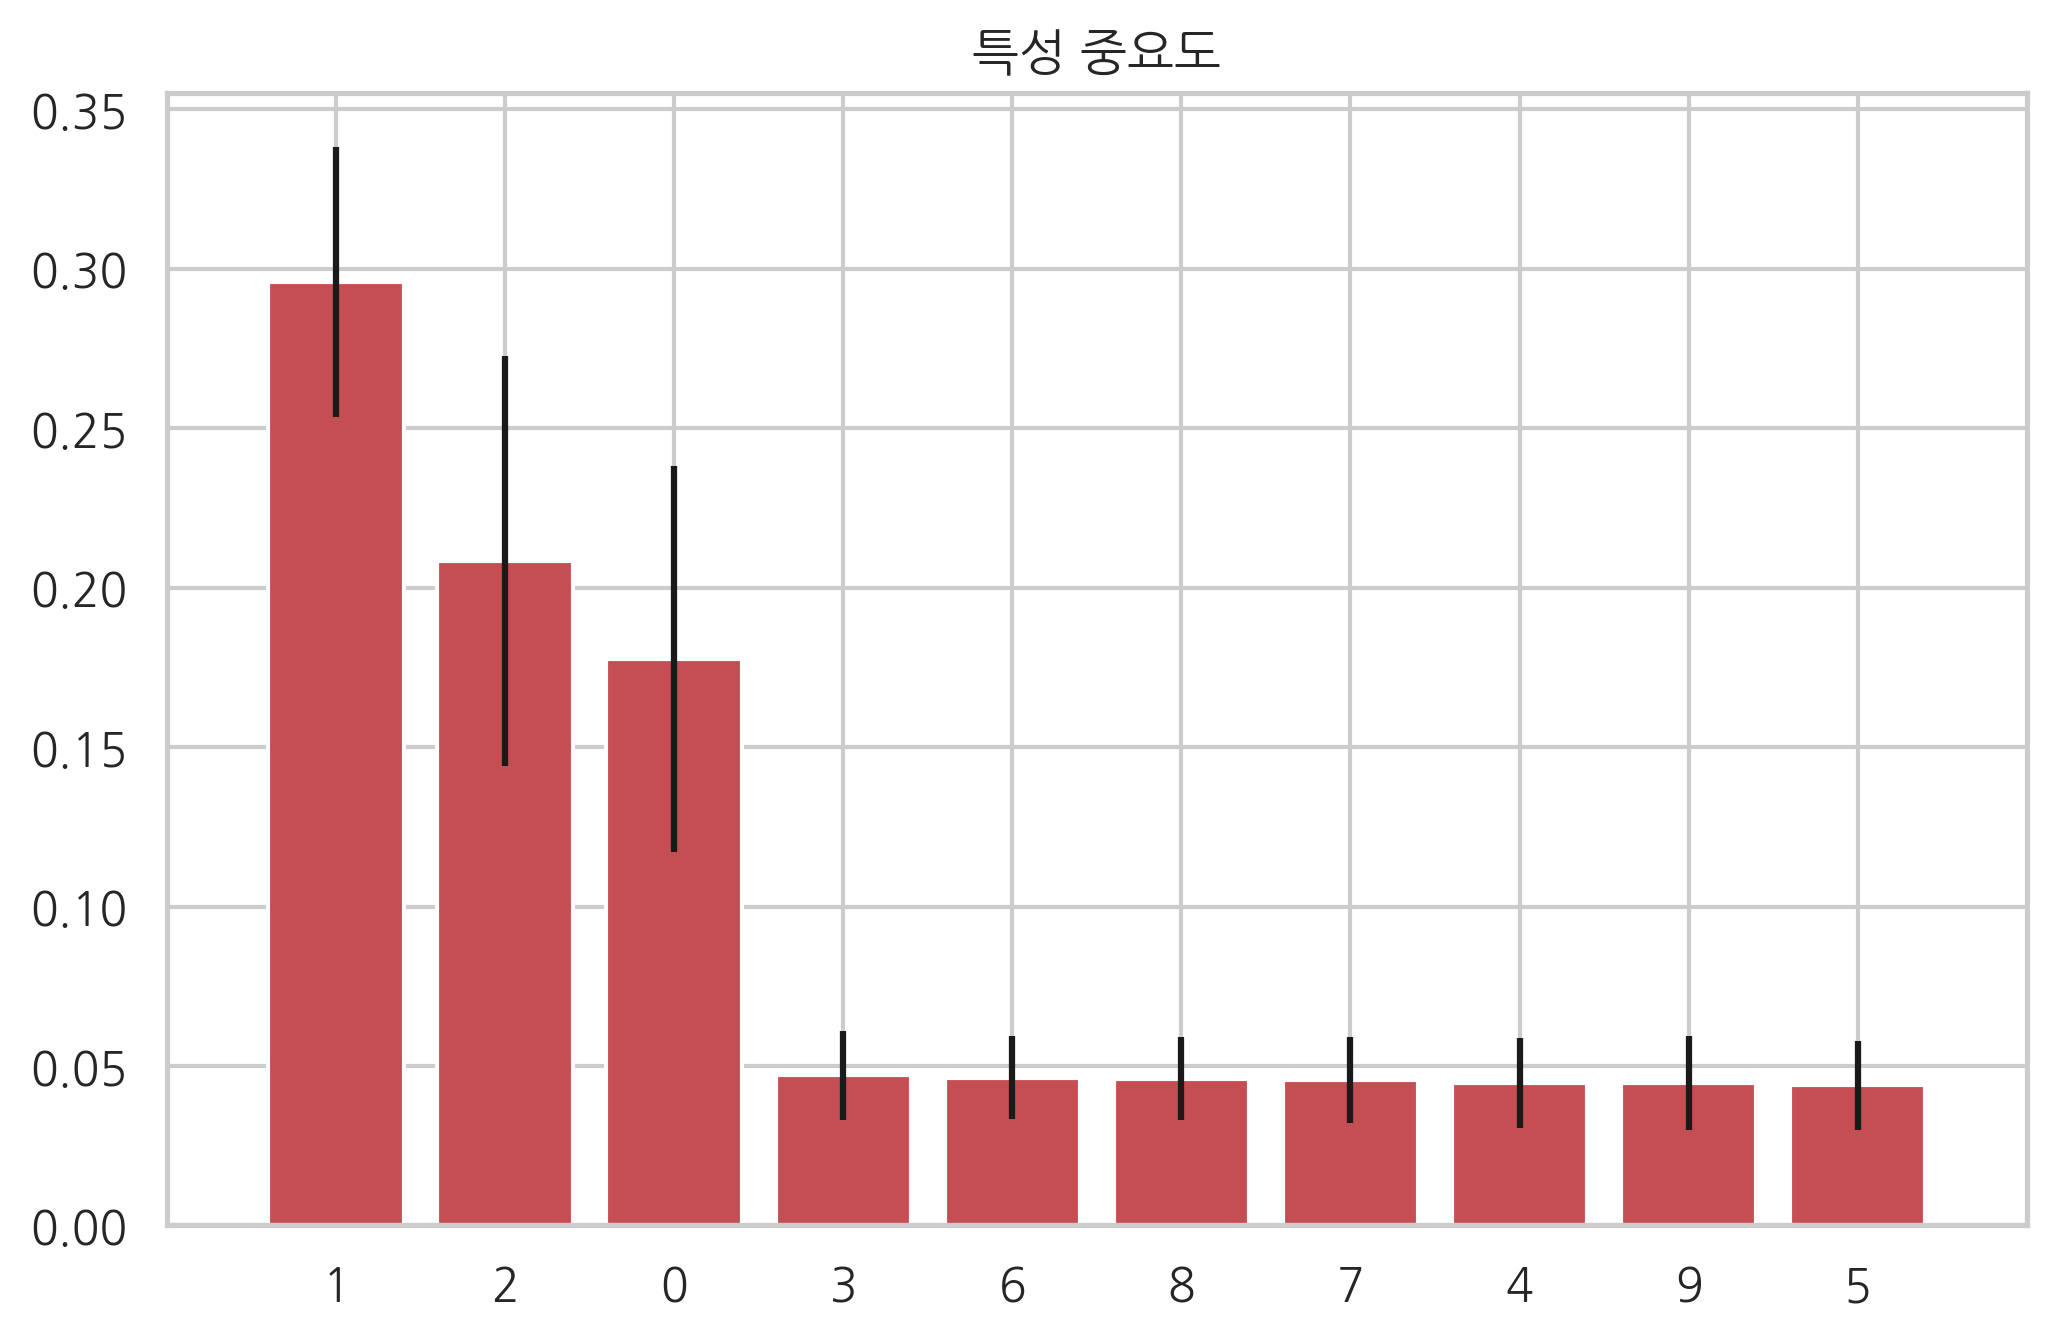

In [7]:
from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier

X, y = make_classification(n_samples=1000, n_features=10, n_informative=3, n_redundant=0, n_repeated=0,
                           n_classes=2, random_state=0, shuffle=False)

forest = ExtraTreesClassifier(n_estimators=250, random_state=0)
forest.fit(X, y)

importances = forest.feature_importances_

std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

plt.title("특성 중요도")
plt.bar(range(X.shape[1]), importances[indices],
        color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

In [18]:
# 랜덤포레스트는 독립변수의 중요도를 계산할 수 있다

다음 코드는 올리베티 얼굴 사진을 Extreme 랜덤포레스트로 구한 뒤 특징(픽셀) 중요도를 이미지로 나타낸 것이다. 

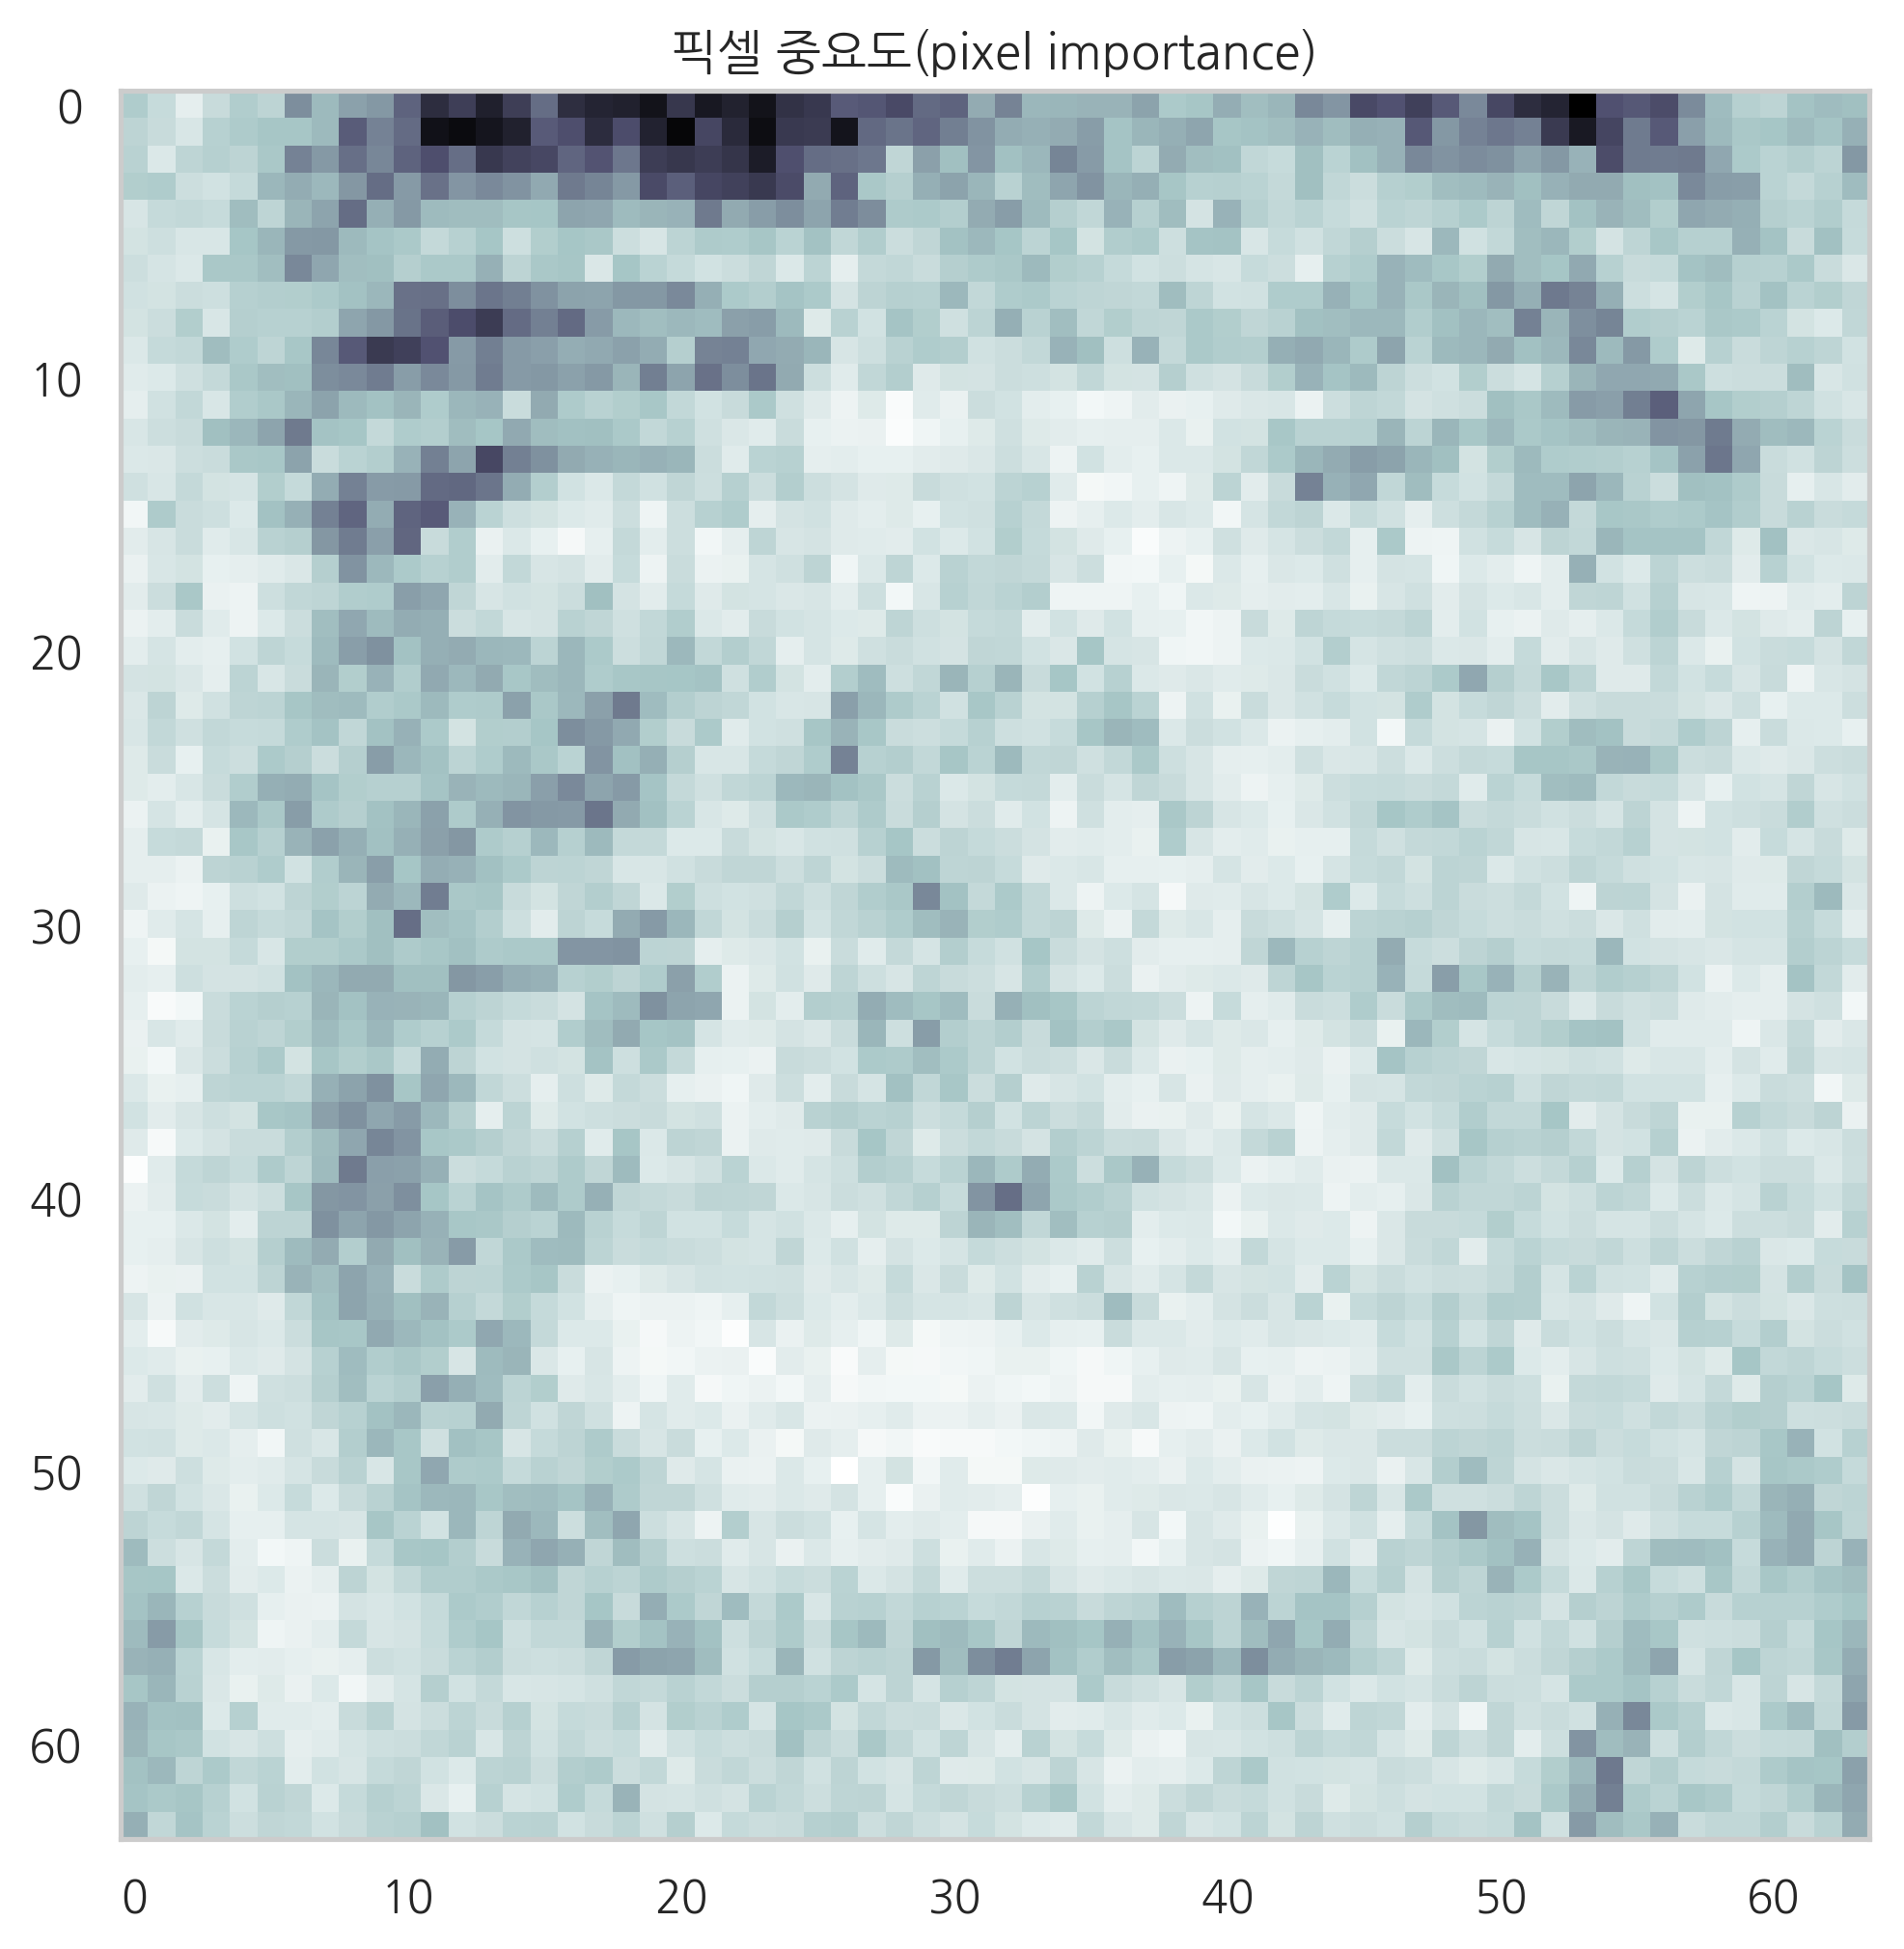

In [8]:
from sklearn.datasets import fetch_olivetti_faces
from sklearn.ensemble import ExtraTreesClassifier

data = fetch_olivetti_faces()
X = data.data
y = data.target

forest = ExtraTreesClassifier(n_estimators=1000, random_state=0)
forest.fit(X, y)

importances = forest.feature_importances_
importances = importances.reshape(data.images[0].shape)

plt.figure(figsize=(8, 8))
plt.imshow(importances, cmap=plt.cm.bone_r)
plt.grid(False)
plt.title("픽셀 중요도(pixel importance)")
plt.show()

In [22]:
# 진하게 나온 부분이 사람의 얼굴 인식에 중요한 부분. 얼굴윤곽, 눈코입의 형태가 진하게 나왔다
# 왼쪽 하단(배경)이 검게 나온 것은 과최적화된 것
    # 이 사람 찍을 때만 배경에서 나타나는 특징 같은 게 잡힌 것. 원래 잡히면 안 된다
    # 배경의 영향을 줄이기 위해 이미지 오그멘테이션(Image Augmentation)을 많이 쓴다.
    # 가짜(카피) 사진을 많이 만든다(스케일링, 좌우 반전, 로테이트).
    # 가짜 사진에는 이러한 배경이 특정한 사진에만 들어가게 된다. 배경이 미치는 영향이 줄어든다

#### 연습 문제 3

1. breast cancer 분류 문제를 Extreme 랜덤포레스트를 사용하여 풀어라. K=5인 교차 검증을 하였을 때 평균 성능을 구하라.
2. 특징 중요도를 구하라. 어떤 특징들이 판별에 중요하게 사용되는가?

In [23]:
# 앞서 랜덤 포레스트, extremely Randomized trees를 쓰게 되면 특징 중요도를 구할 수 있다고 했다

In [26]:
# 연습문제 1

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import VotingClassifier

cancer = load_breast_cancer()
X = cancer.data
y = cancer.target

model1 = LogisticRegression()
model2 = QuadraticDiscriminantAnalysis()
model3 = GaussianNB()
model4 = DecisionTreeClassifier()
model = VotingClassifier(
    estimators=[('lr', model1), ('qda', model2), ('gnb', model3)], 
    voting='soft', weights=[1, 1.5, 1])

cv = KFold(5, shuffle=True, random_state=0)
accuracy = cross_val_score(model, X, y, scoring="accuracy", cv=cv)
accuracy.mean(), accuracy.std()

/Users/Im/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Users/Im/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model

(0.9701443875174661, 0.018875225344533977)

In [27]:
from sklearn.ensemble import BaggingClassifier

model1 = DecisionTreeClassifier(max_depth=5)
model2 = BaggingClassifier(DecisionTreeClassifier(max_depth=5), n_estimators=100)
accuracy1 = cross_val_score(model1, X, y, scoring="accuracy", cv=cv)
accuracy2 = cross_val_score(model2, X, y, scoring="accuracy", cv=cv)
accuracy1.mean(), accuracy1.std(), accuracy2.mean(), accuracy2.std()

(0.9297469337059463,
 0.01828945457010364,
 0.9561092997981679,
 0.01917587033296463)

In [28]:
from sklearn.ensemble import ExtraTreesClassifier

forest = ExtraTreesClassifier(n_estimators=500, random_state=0).fit(X, y)
accuracy = cross_val_score(forest, X, y, scoring="accuracy", cv=cv)
accuracy.mean(), accuracy.std()

(0.9701754385964911, 0.020459480332790547)

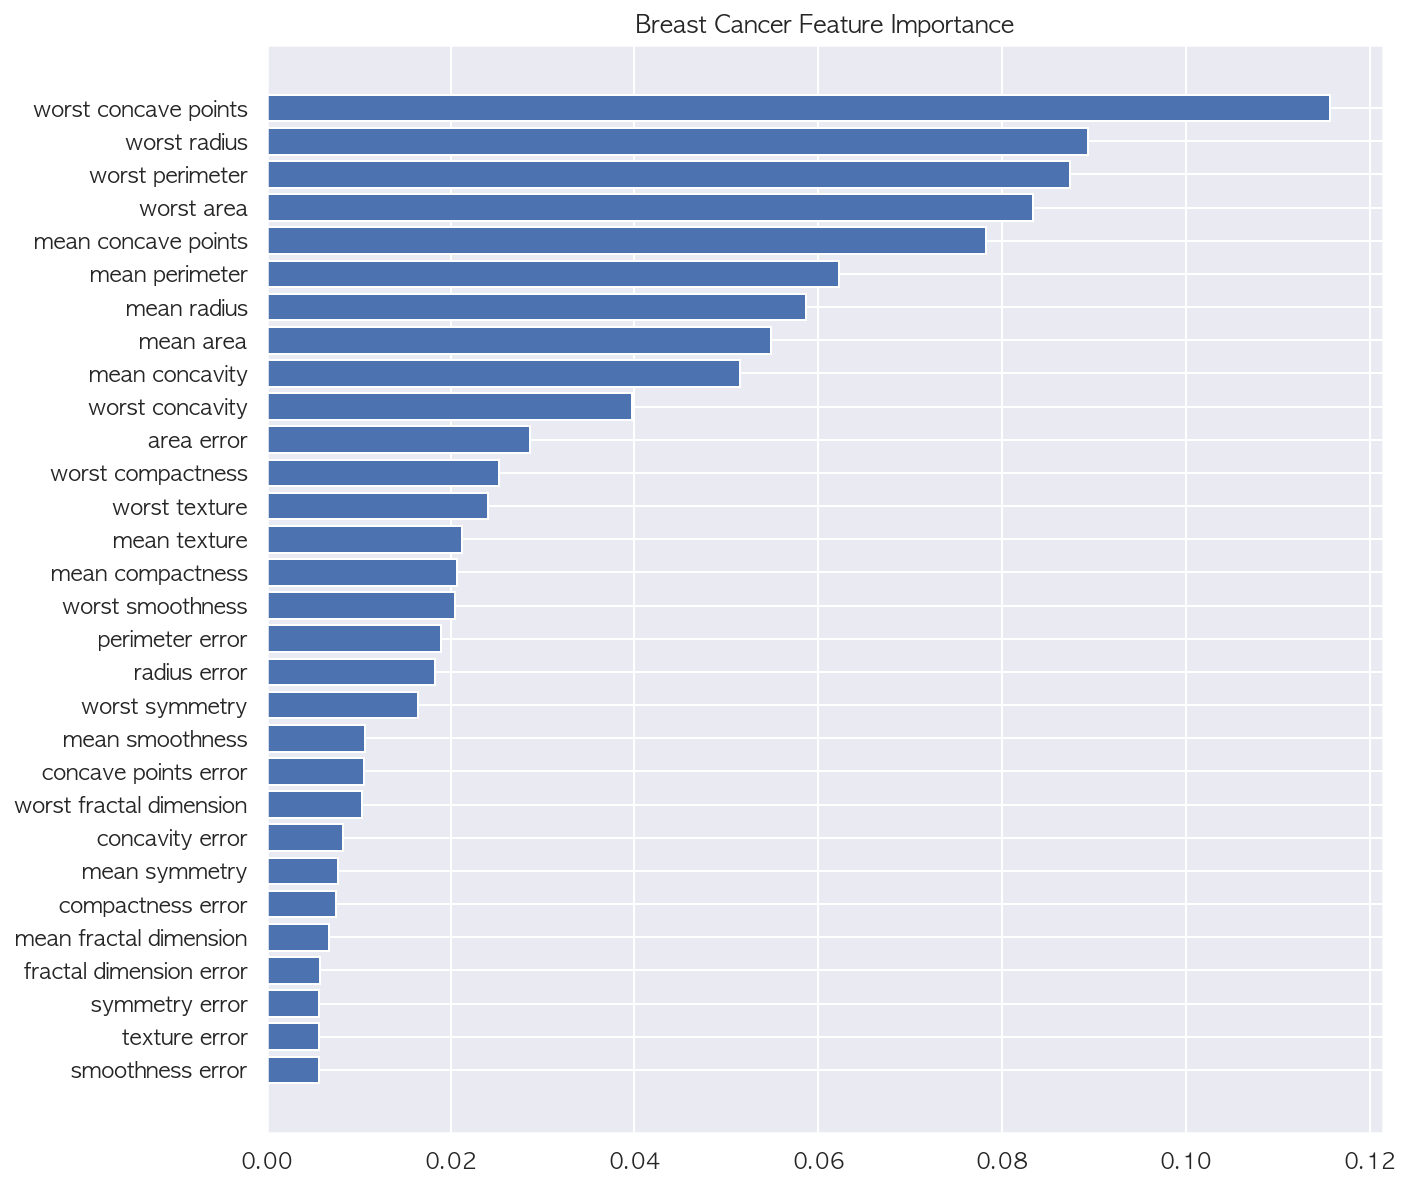

In [29]:
idx = np.argsort(forest.feature_importances_)
# argsort는 순서를 소팅을 실제로 하는 게 아니라 몇번이 1번이고 2번인지 번호만 알려준다
# 이를 가져다가 인덱스로 써서 다시 한번 소팅하게 되면 진짜로 소팅하게 되는 것
names = cancer.feature_names[idx]
values = forest.feature_importances_[idx]

plt.figure(figsize=(10, 10))
plt.barh(names, values)
plt.title("Breast Cancer Feature Importance")
plt.show()